In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Income_mean,Income_last,Total Business Value_sum,Total Business Value_min,Total Business Value_max,Total Business Value_mean,Total Business Value_last,City_last,Education_Level_last,Joining Designation_last,...,Grade_max,Grade_mean,Grade_last,Quarterly Rating_max,Gender_last,churn,rating_change,income_change,days_worked,current_month
0,57387.0,57387.0,1715580.0,-665480.0,2381060.0,571860.0,0.0,23,2.0,1.0,...,1.0,1.0,1.0,2.0,0.0,1,0,0,68,3
1,67016.0,67016.0,0.0,0.0,0.0,0.0,0.0,7,2.0,2.0,...,2.0,2.0,2.0,1.0,0.0,0,0,0,26,12
2,65603.0,65603.0,350000.0,0.0,350000.0,70000.0,0.0,13,2.0,2.0,...,2.0,2.0,2.0,1.0,0.0,1,0,0,117,4
3,46368.0,46368.0,120360.0,0.0,120360.0,40120.0,0.0,9,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1,0,0,52,3
4,78728.0,78728.0,1265000.0,0.0,1265000.0,253000.0,0.0,11,1.0,3.0,...,3.0,3.0,3.0,2.0,1.0,0,1,0,124,12


#### Univariate Analysis

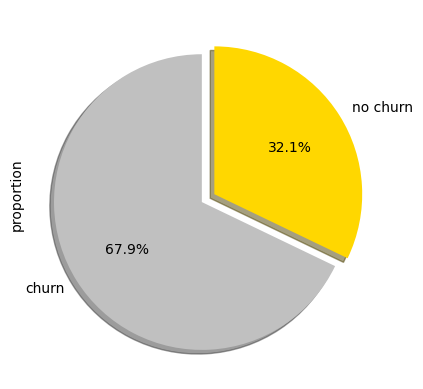

In [3]:
(df.churn.value_counts(normalize = True) * 100).round(2).plot(kind = "pie", labels= ["churn", "no churn"], explode = (0.1, 0), autopct= "%1.1f%%", shadow=True, startangle=90, colors = ["silver", "gold"])
plt.show()

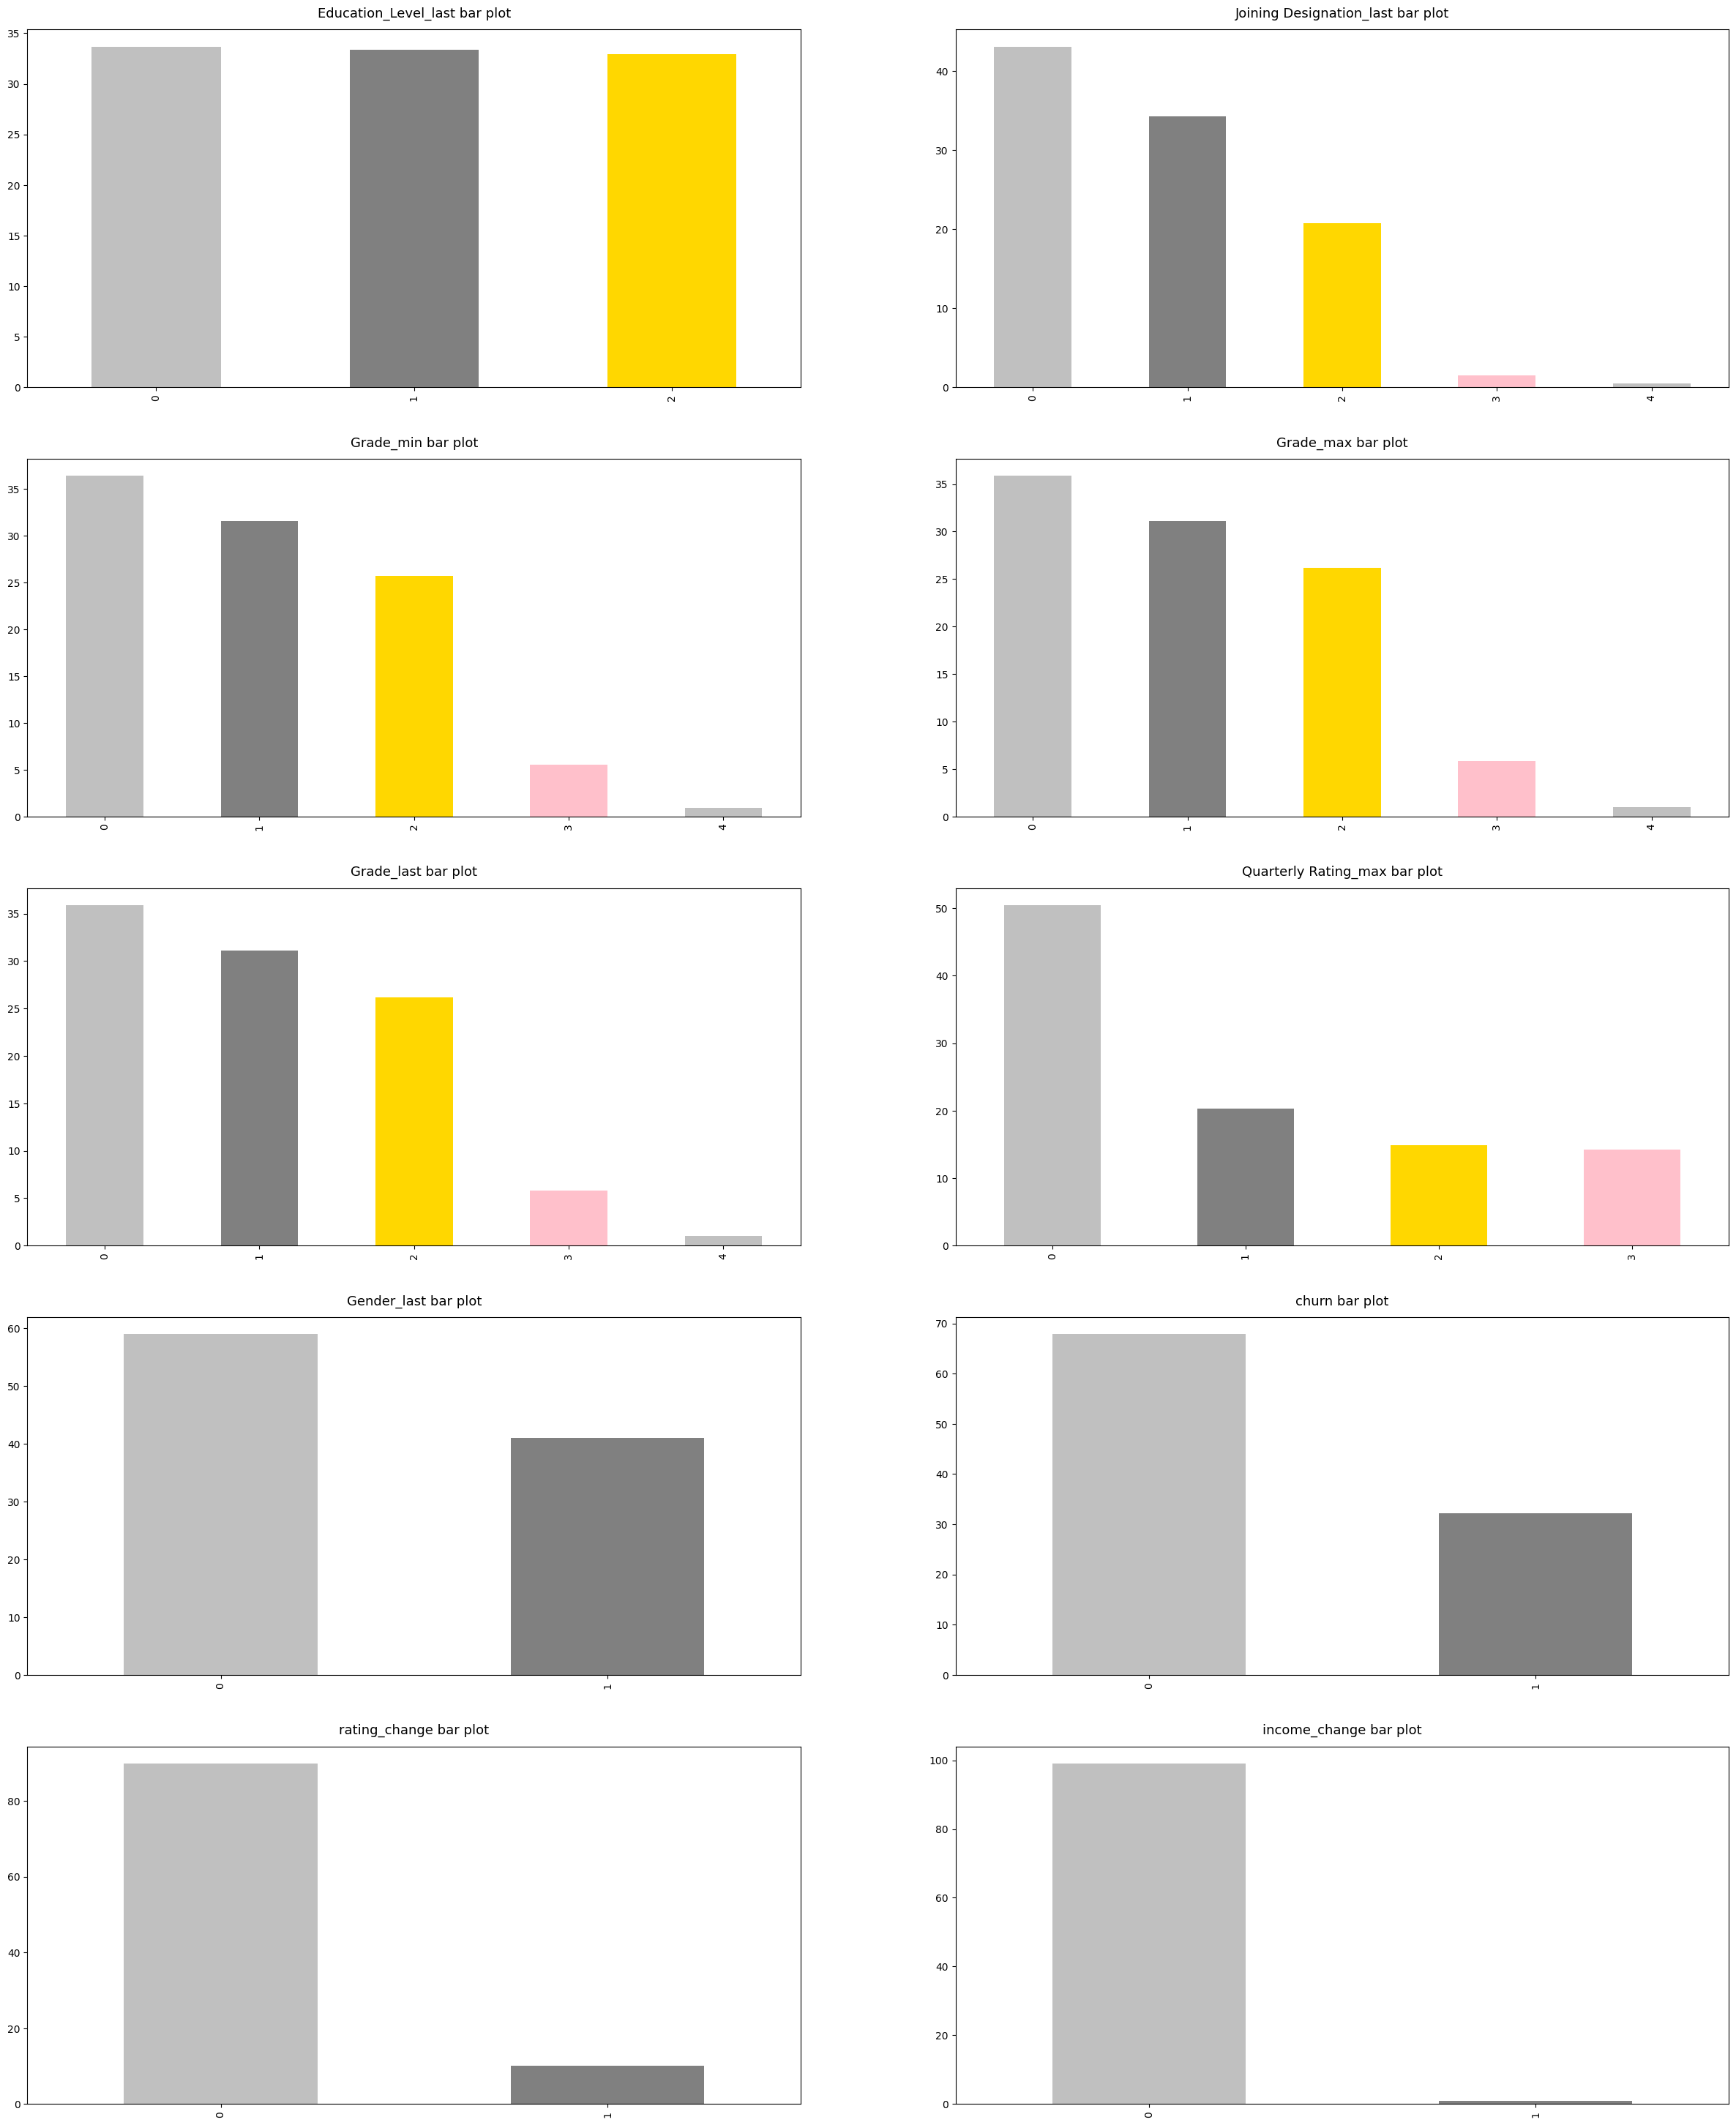

In [4]:
colors = ["Silver", "grey", "gold", "pink"]
categorical_features = [col for col in df.columns if (df[col].nunique() <= 10 or df[col].dtype == "O")]

cols = 2
rows = len(categorical_features) // cols

fig, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (30,15))
fig.subplots_adjust(top = 2.0)

ind = 0
for row in range(rows):
    for col in range(cols):
        required = (df[categorical_features[ind]].value_counts(normalize = True) * 100).round(2).reset_index().sort_values(by = "proportion", ascending = False).loc[:,"proportion"]
        required.plot(kind = "bar", ax = axs[row, col], color = colors)
        axs[row,col].set_title(f'{categorical_features[ind]} bar plot', pad=12, fontsize=13)
        ind += 1
plt.show()   

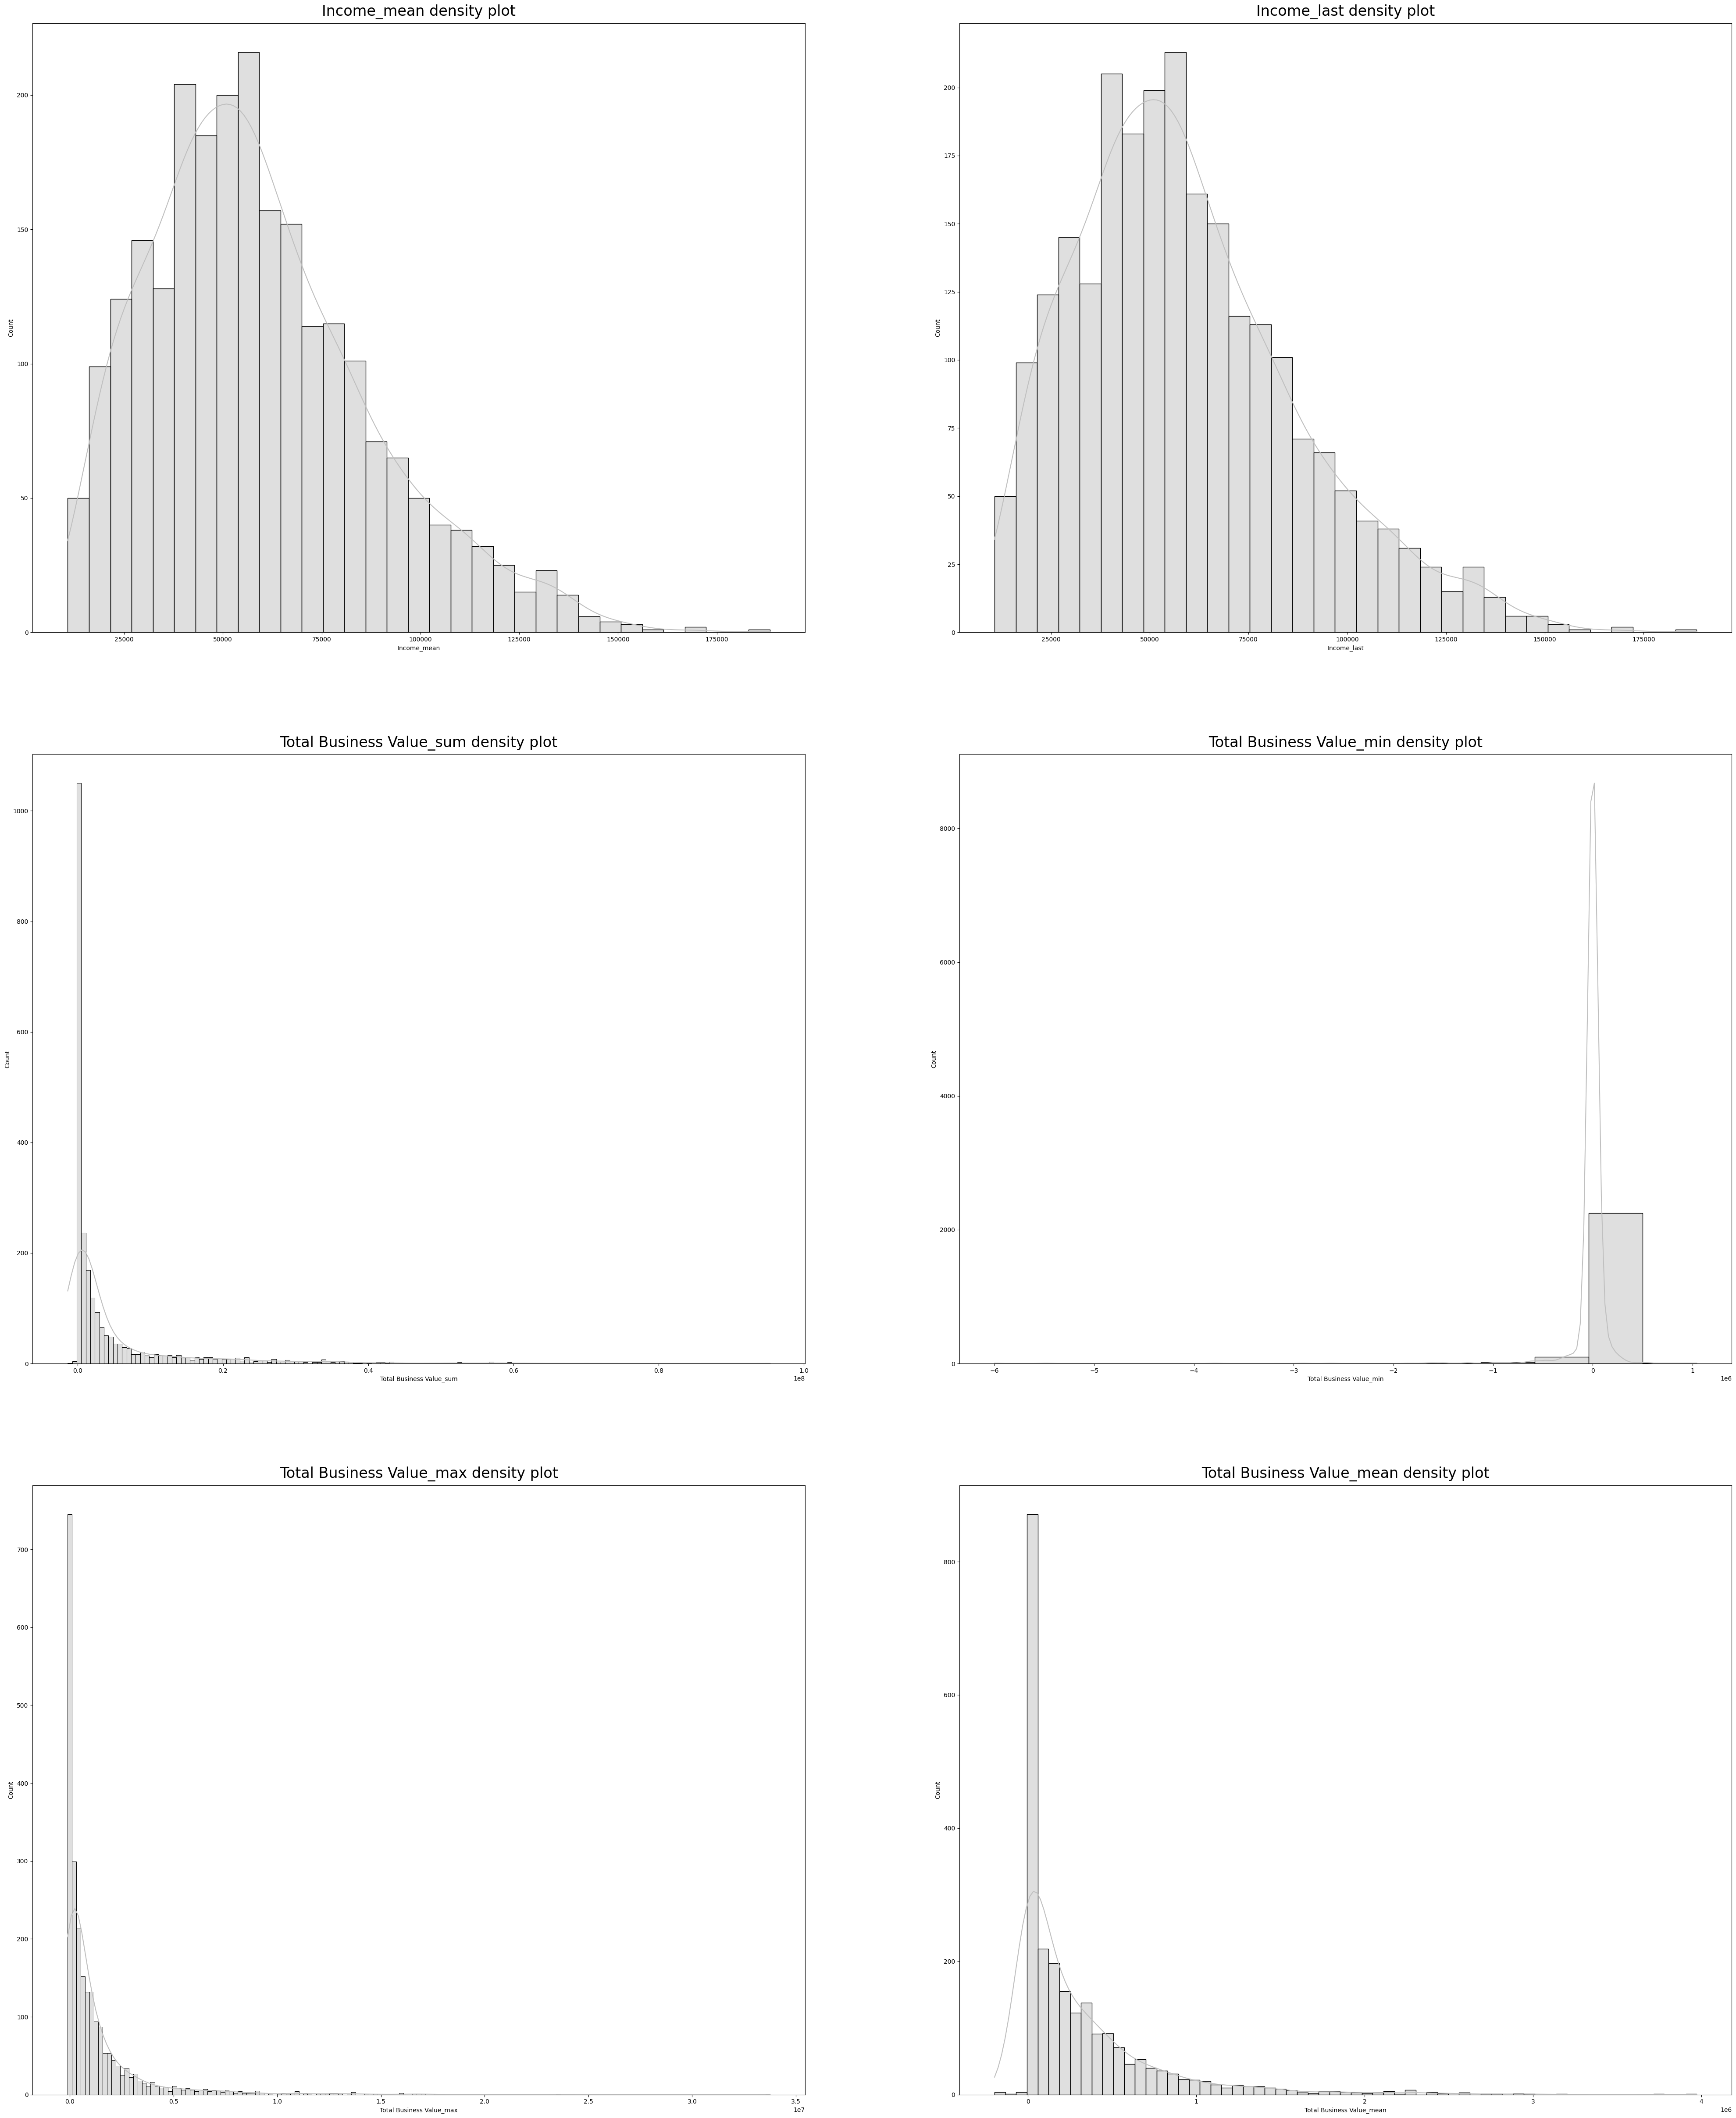

In [5]:
numerical_features = [col for col in df.columns if df[col].nunique() >= 10]

cols = 2
rows = len(numerical_features) // cols

fig, axs = plt.subplots(nrows = rows // 2, ncols = cols, figsize = (50,25))
fig.subplots_adjust(top = 2.0)

ind = 0
for row in range(rows // 2):
    for col in range(cols):
        sns.histplot(data = df, x = numerical_features[ind], color = "silver",  ax = axs[row, col], kde = True)
        axs[row,col].set_title(f'{numerical_features[ind]} density plot', pad = 12, fontsize = 24, color = "black")
        ind += 1
plt.show()   


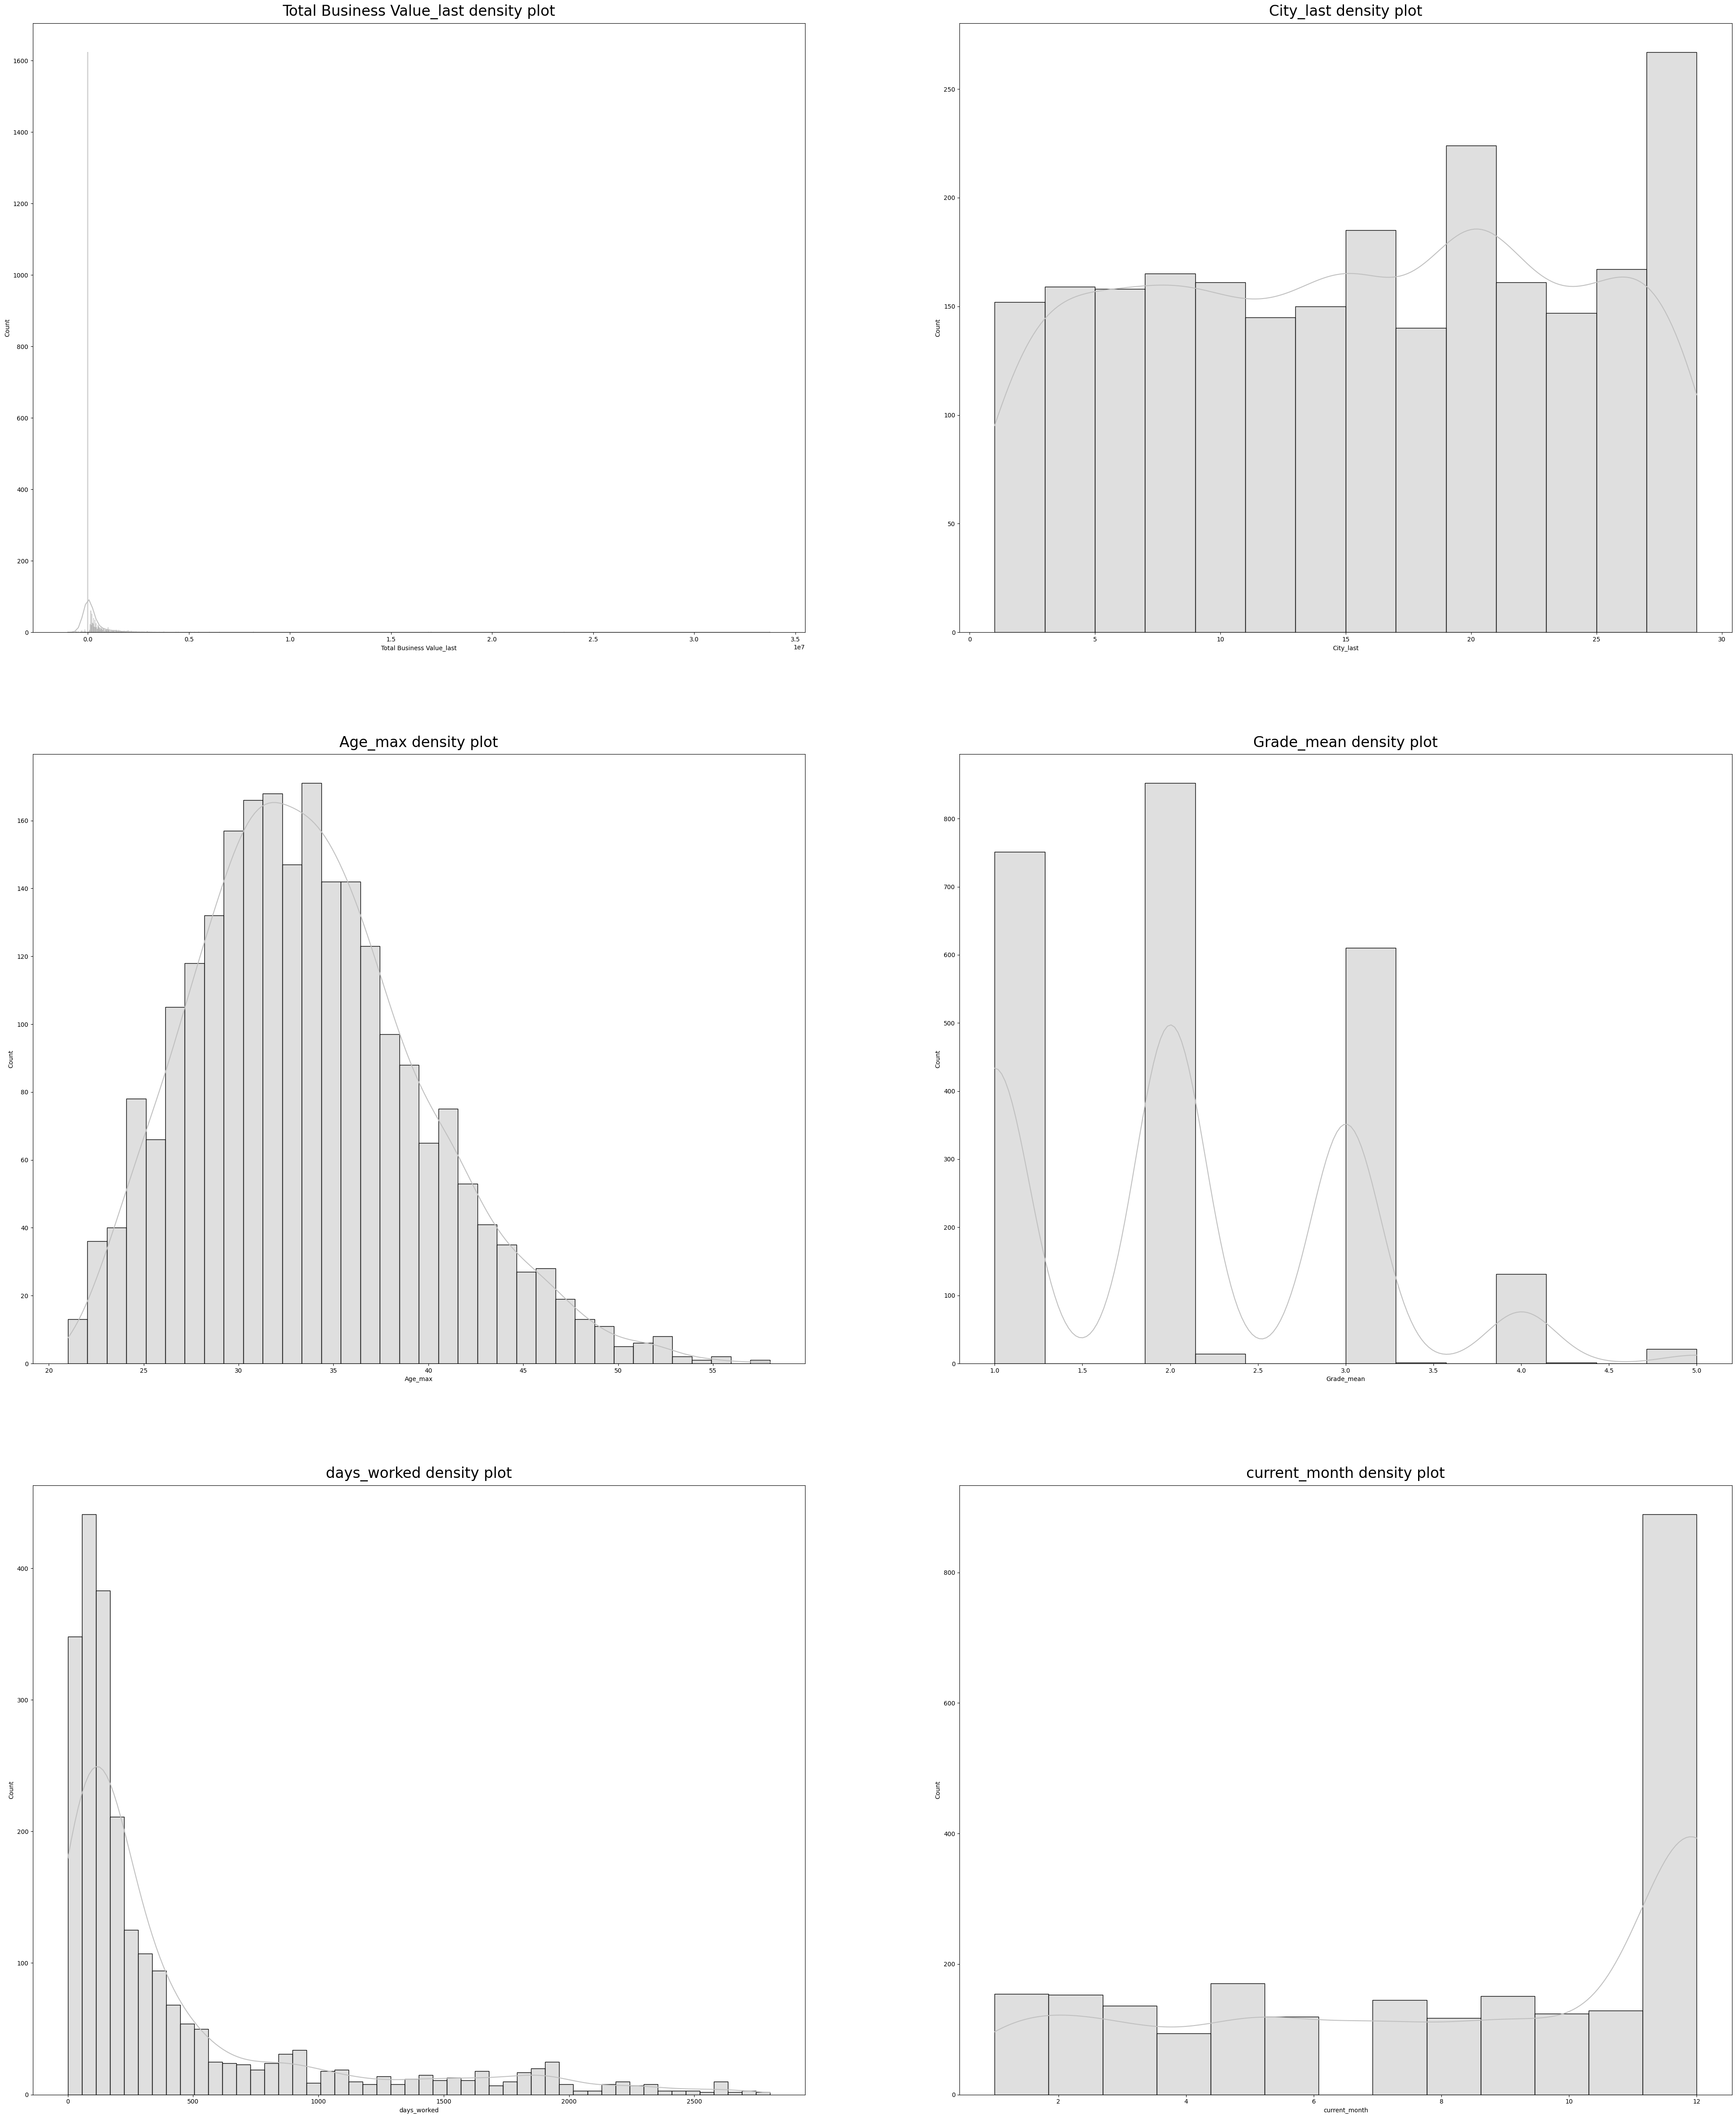

In [6]:
cols = 2
rows = len(numerical_features) // (2 * cols)
ind = len(numerical_features) // 2

fig, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (50,25))
fig.subplots_adjust(top = 2.0)

for row in range(rows):
    for col in range(cols):
        sns.histplot(data = df, x = numerical_features[ind], color = "silver",  ax = axs[row, col], kde = True)
        axs[row,col].set_title(f'{numerical_features[ind]} density plot', pad = 12, fontsize = 24, color = "black")
        ind += 1
plt.show()  

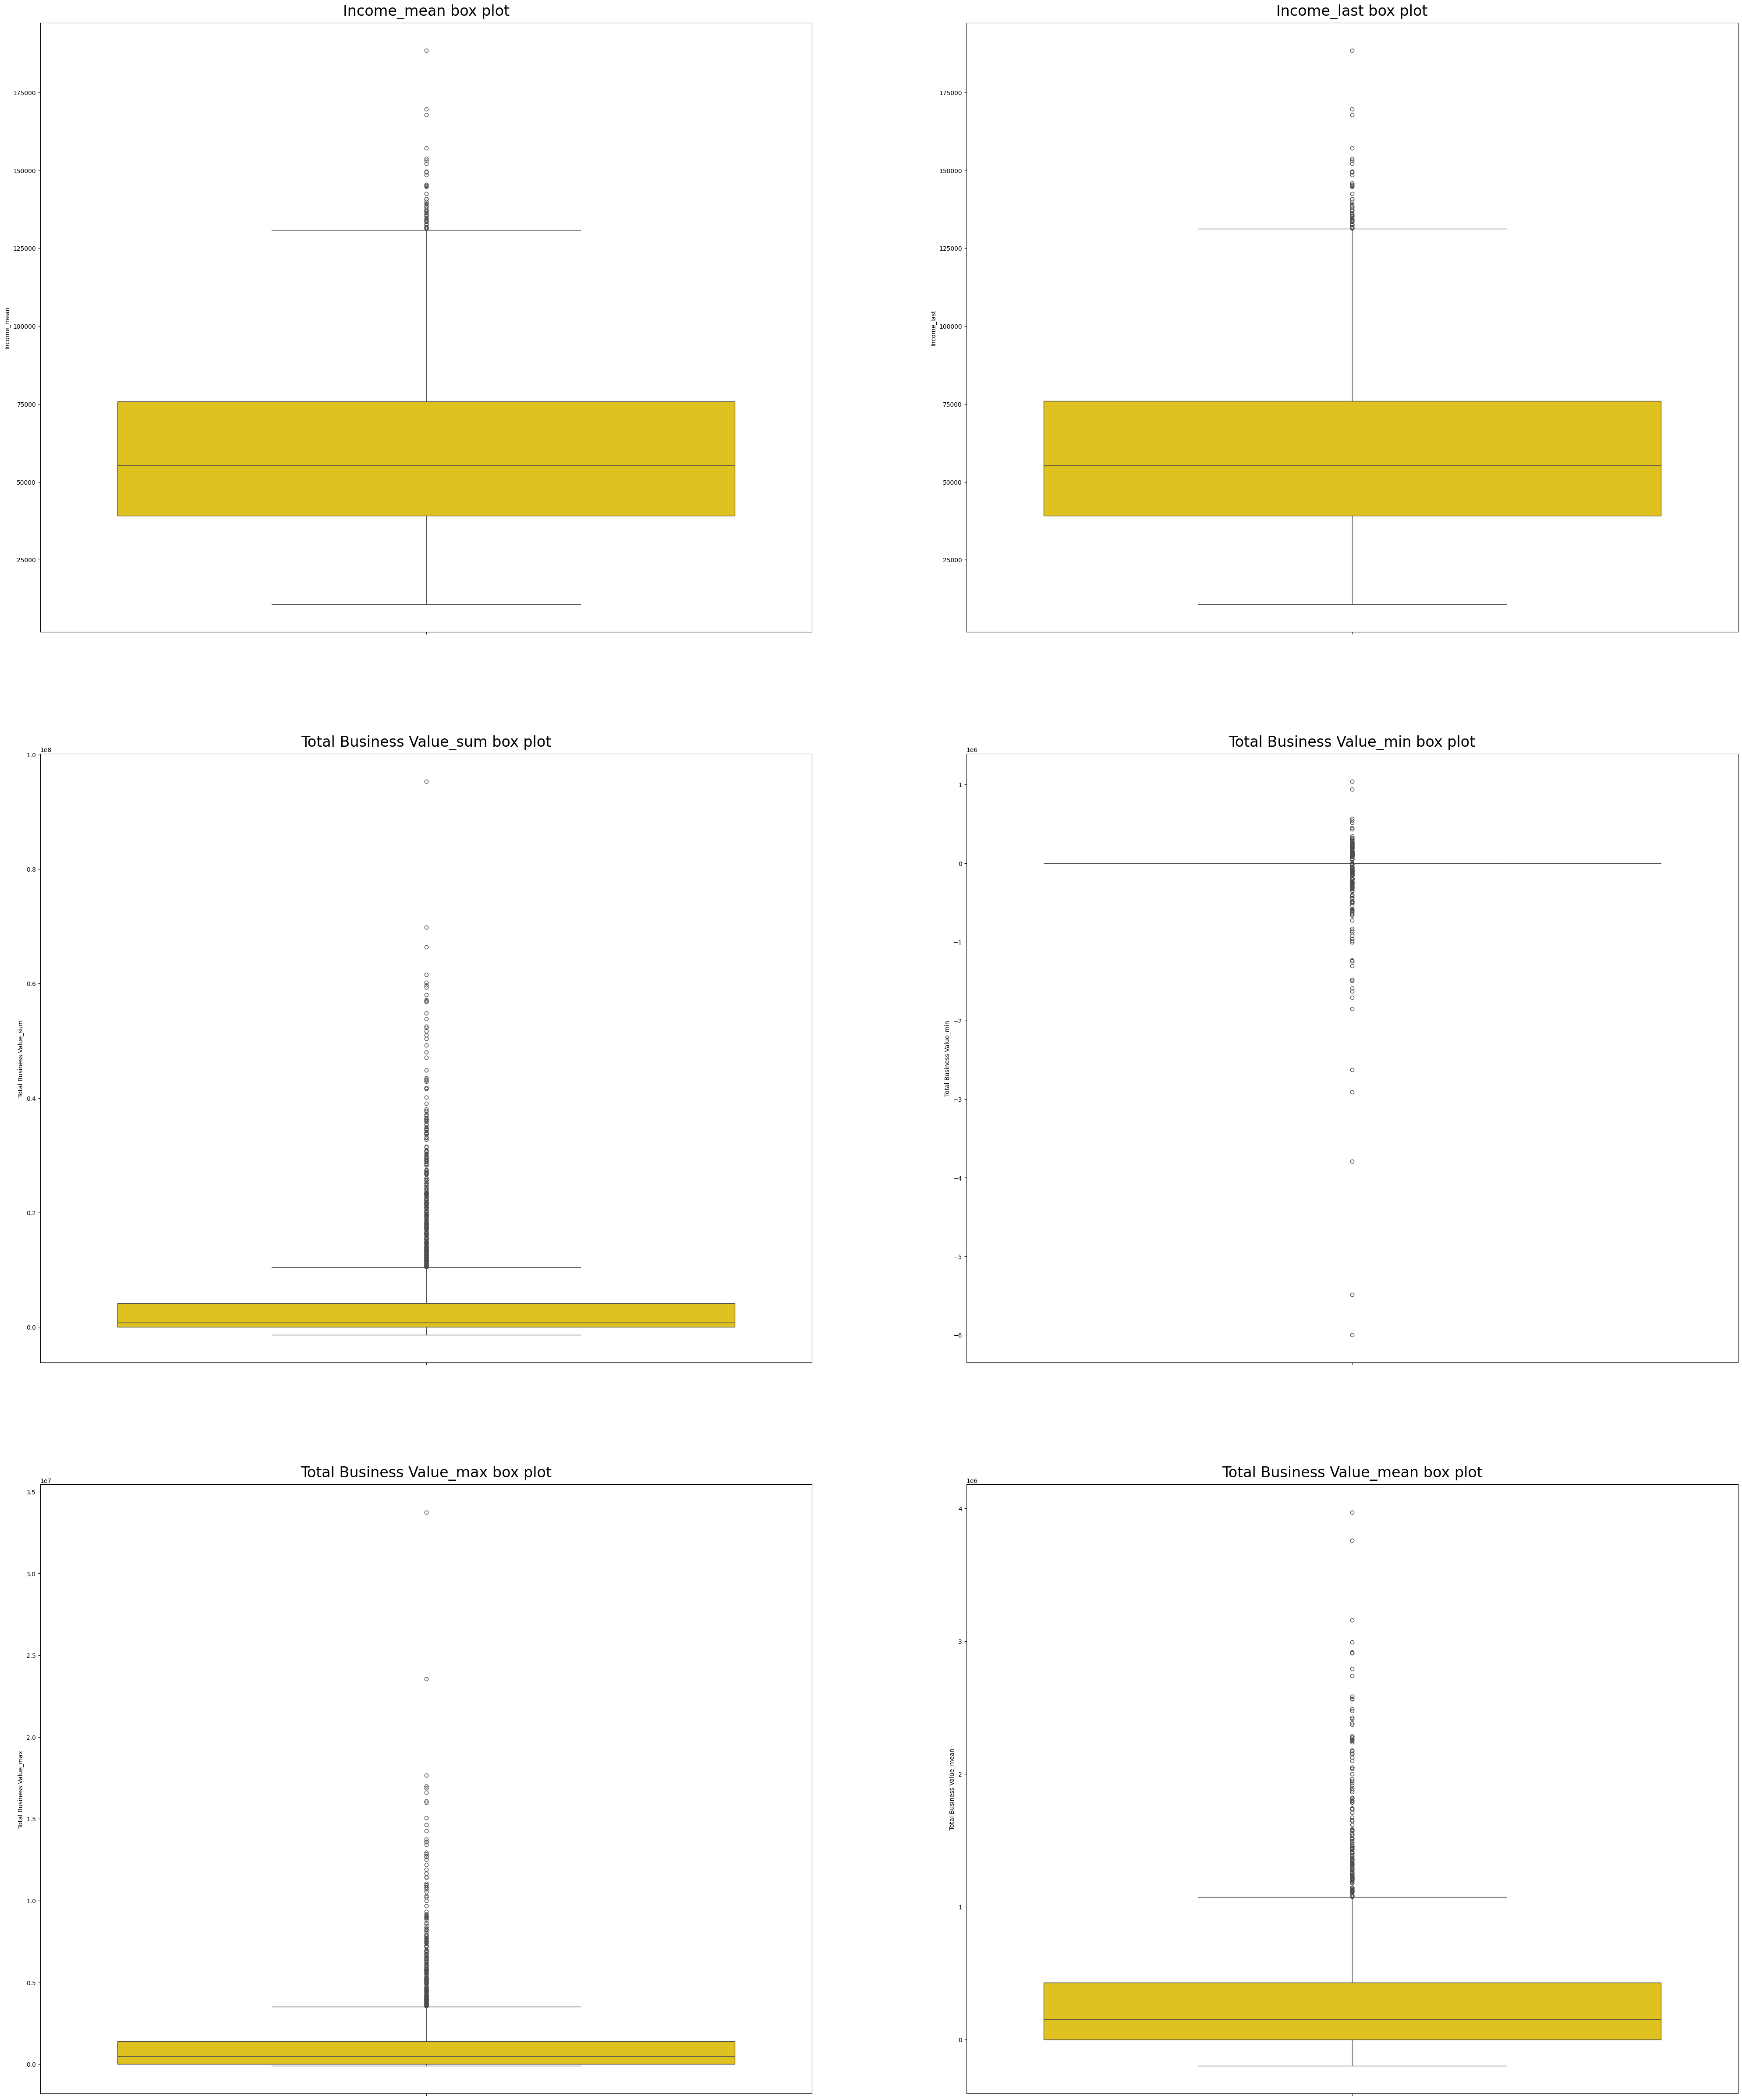

In [7]:
cols = 2
rows = len(numerical_features) // cols

fig, axs = plt.subplots(nrows = rows // 2, ncols = cols, figsize = (50,25))
fig.subplots_adjust(top = 2.0)

ind = 0
for row in range(rows // 2):
    for col in range(cols):
        sns.boxplot(data = df, y = numerical_features[ind], color = "gold",  ax = axs[row, col])
        axs[row,col].set_title(f'{numerical_features[ind]} box plot', pad = 12, fontsize = 24, color = "black")
        ind += 1
plt.show()   

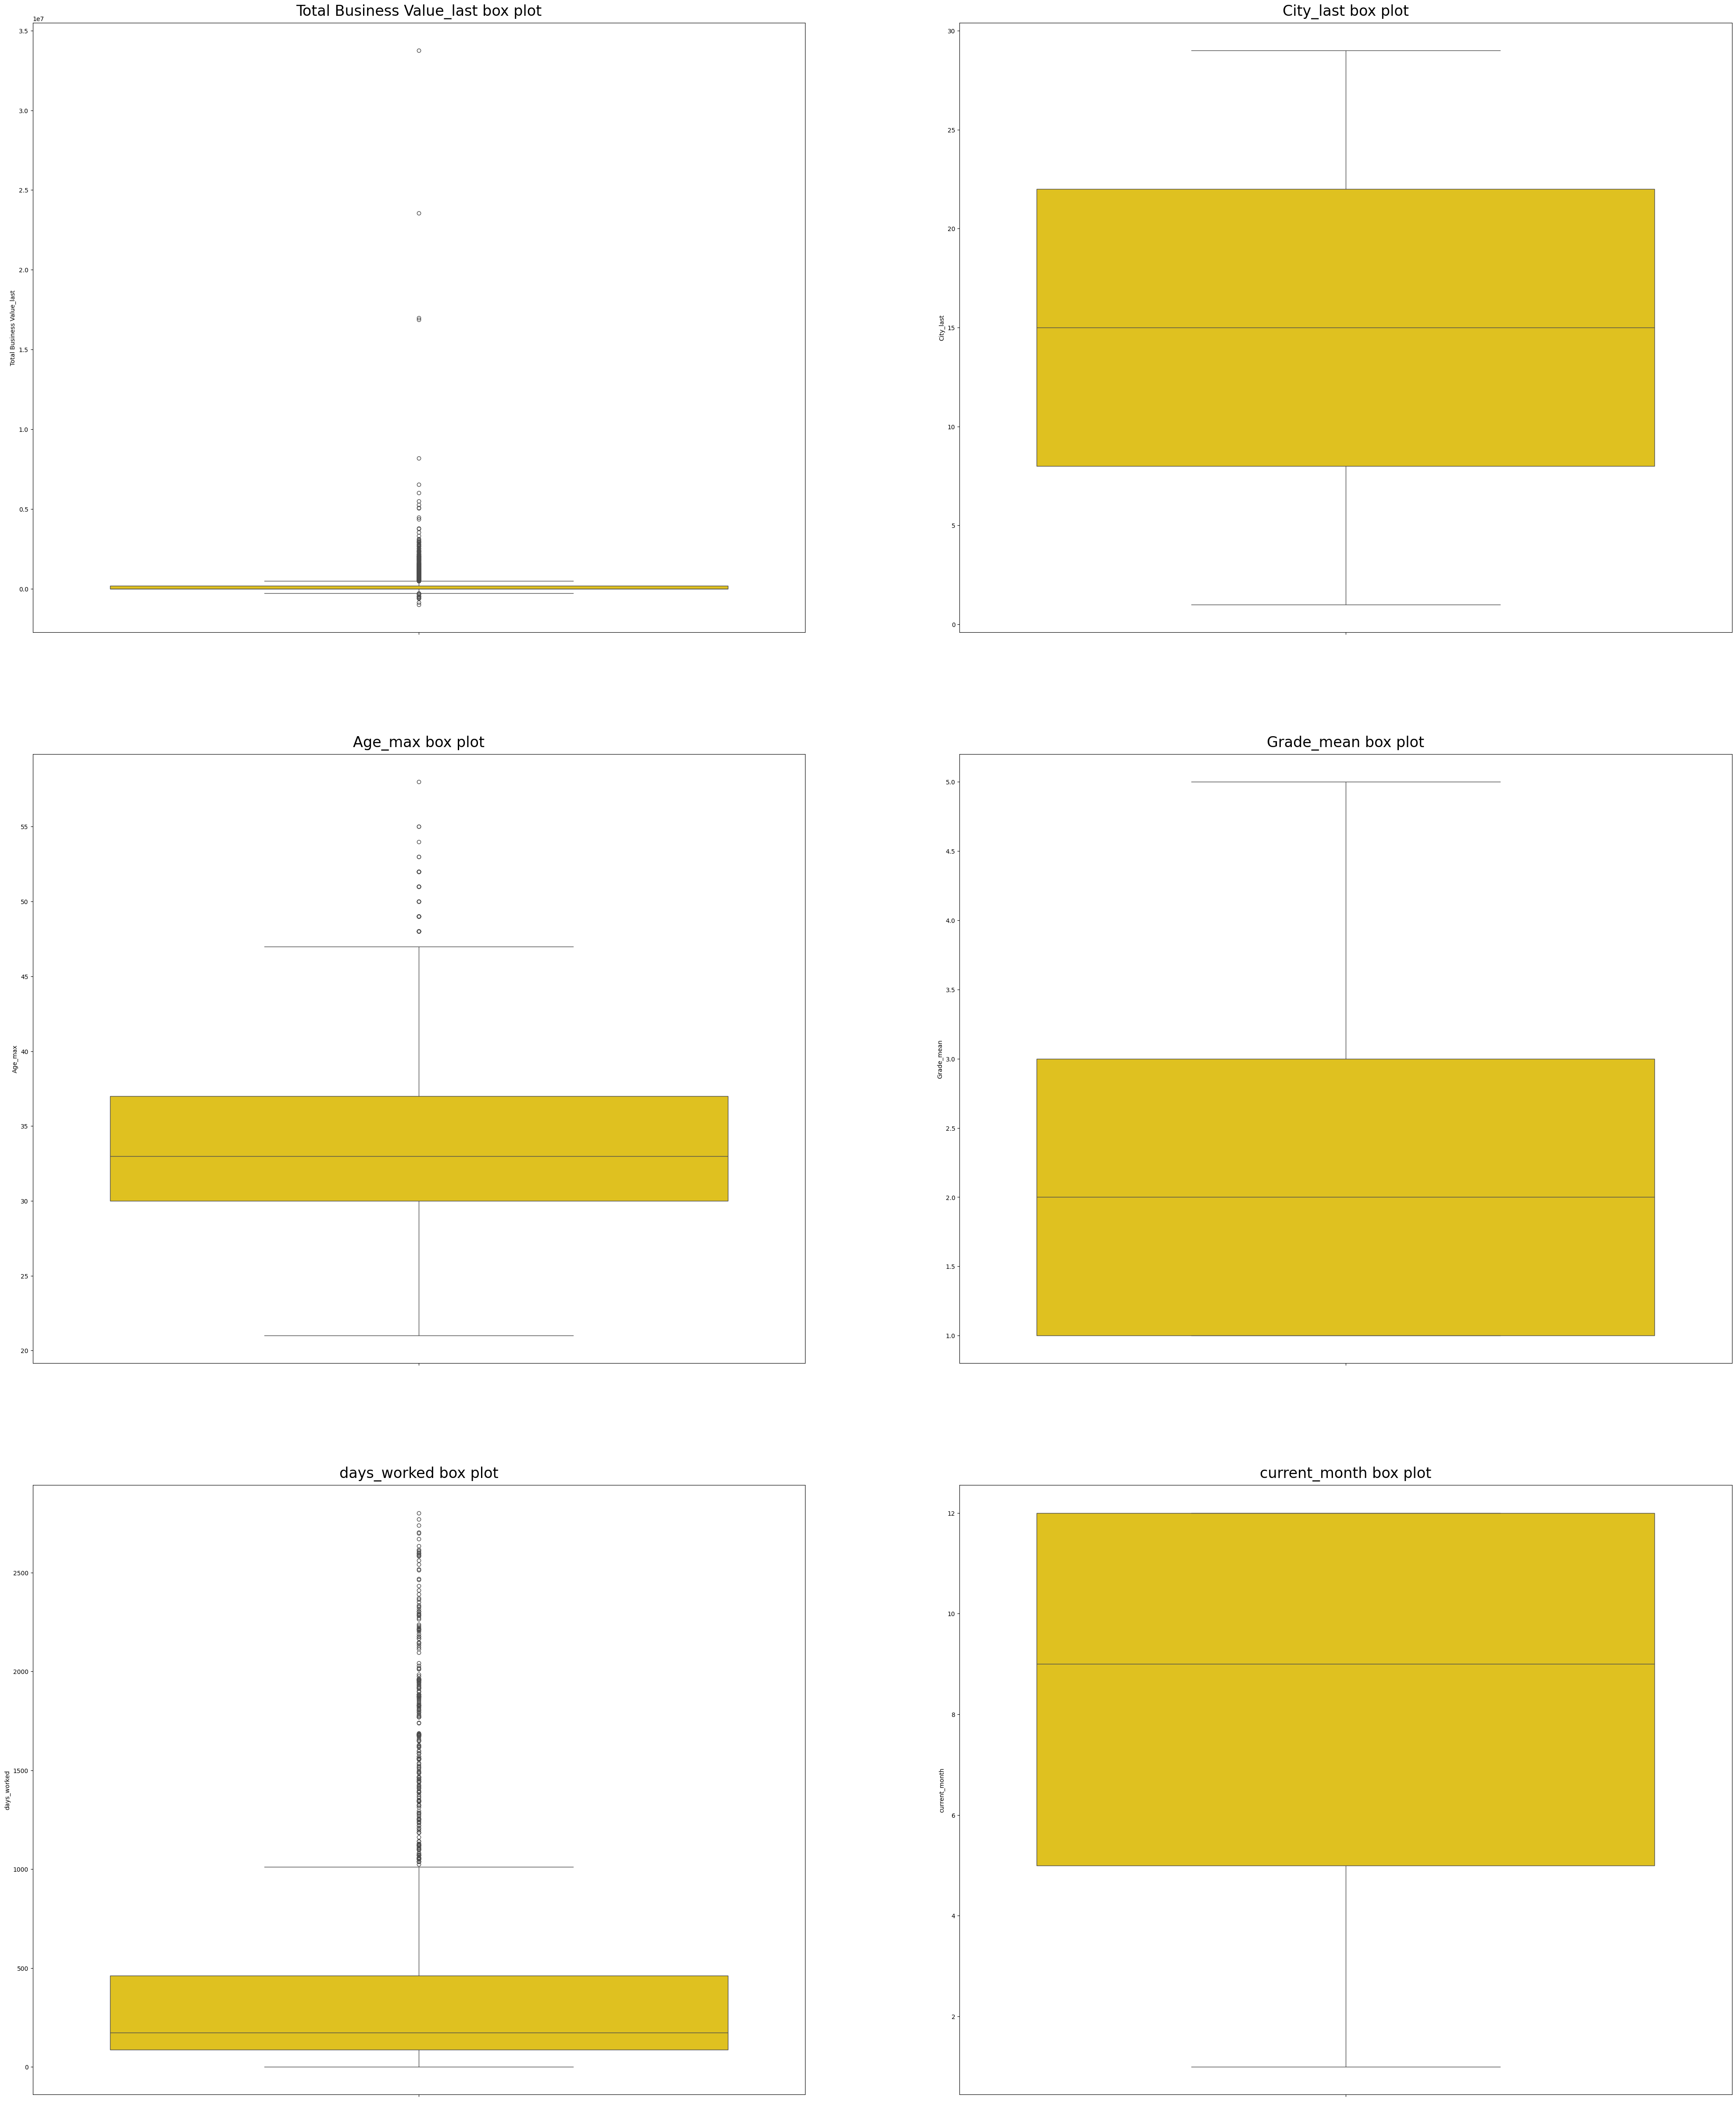

In [8]:
cols = 2
rows = len(numerical_features) // (2 * cols)
ind = len(numerical_features) // 2

fig, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (50,25))
fig.subplots_adjust(top = 2.0)

for row in range(rows):
    for col in range(cols):
        sns.boxplot(data = df, y = numerical_features[ind], color = "gold",  ax = axs[row, col])
        axs[row,col].set_title(f'{numerical_features[ind]} box plot', pad = 12, fontsize = 24, color = "black")
        ind += 1
plt.show()  

#### Bivariate Analysis

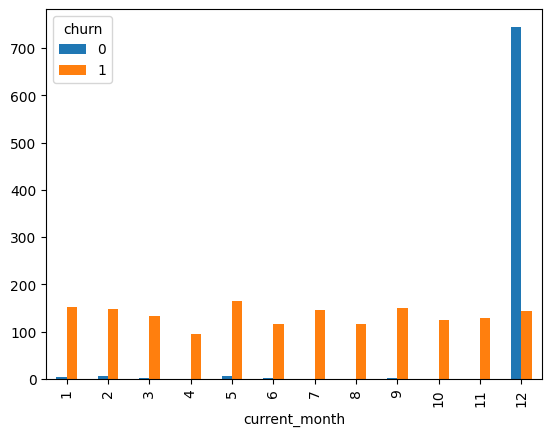

In [9]:
pd.crosstab(index = df["current_month"], columns = df["churn"]).plot.bar()
plt.show()

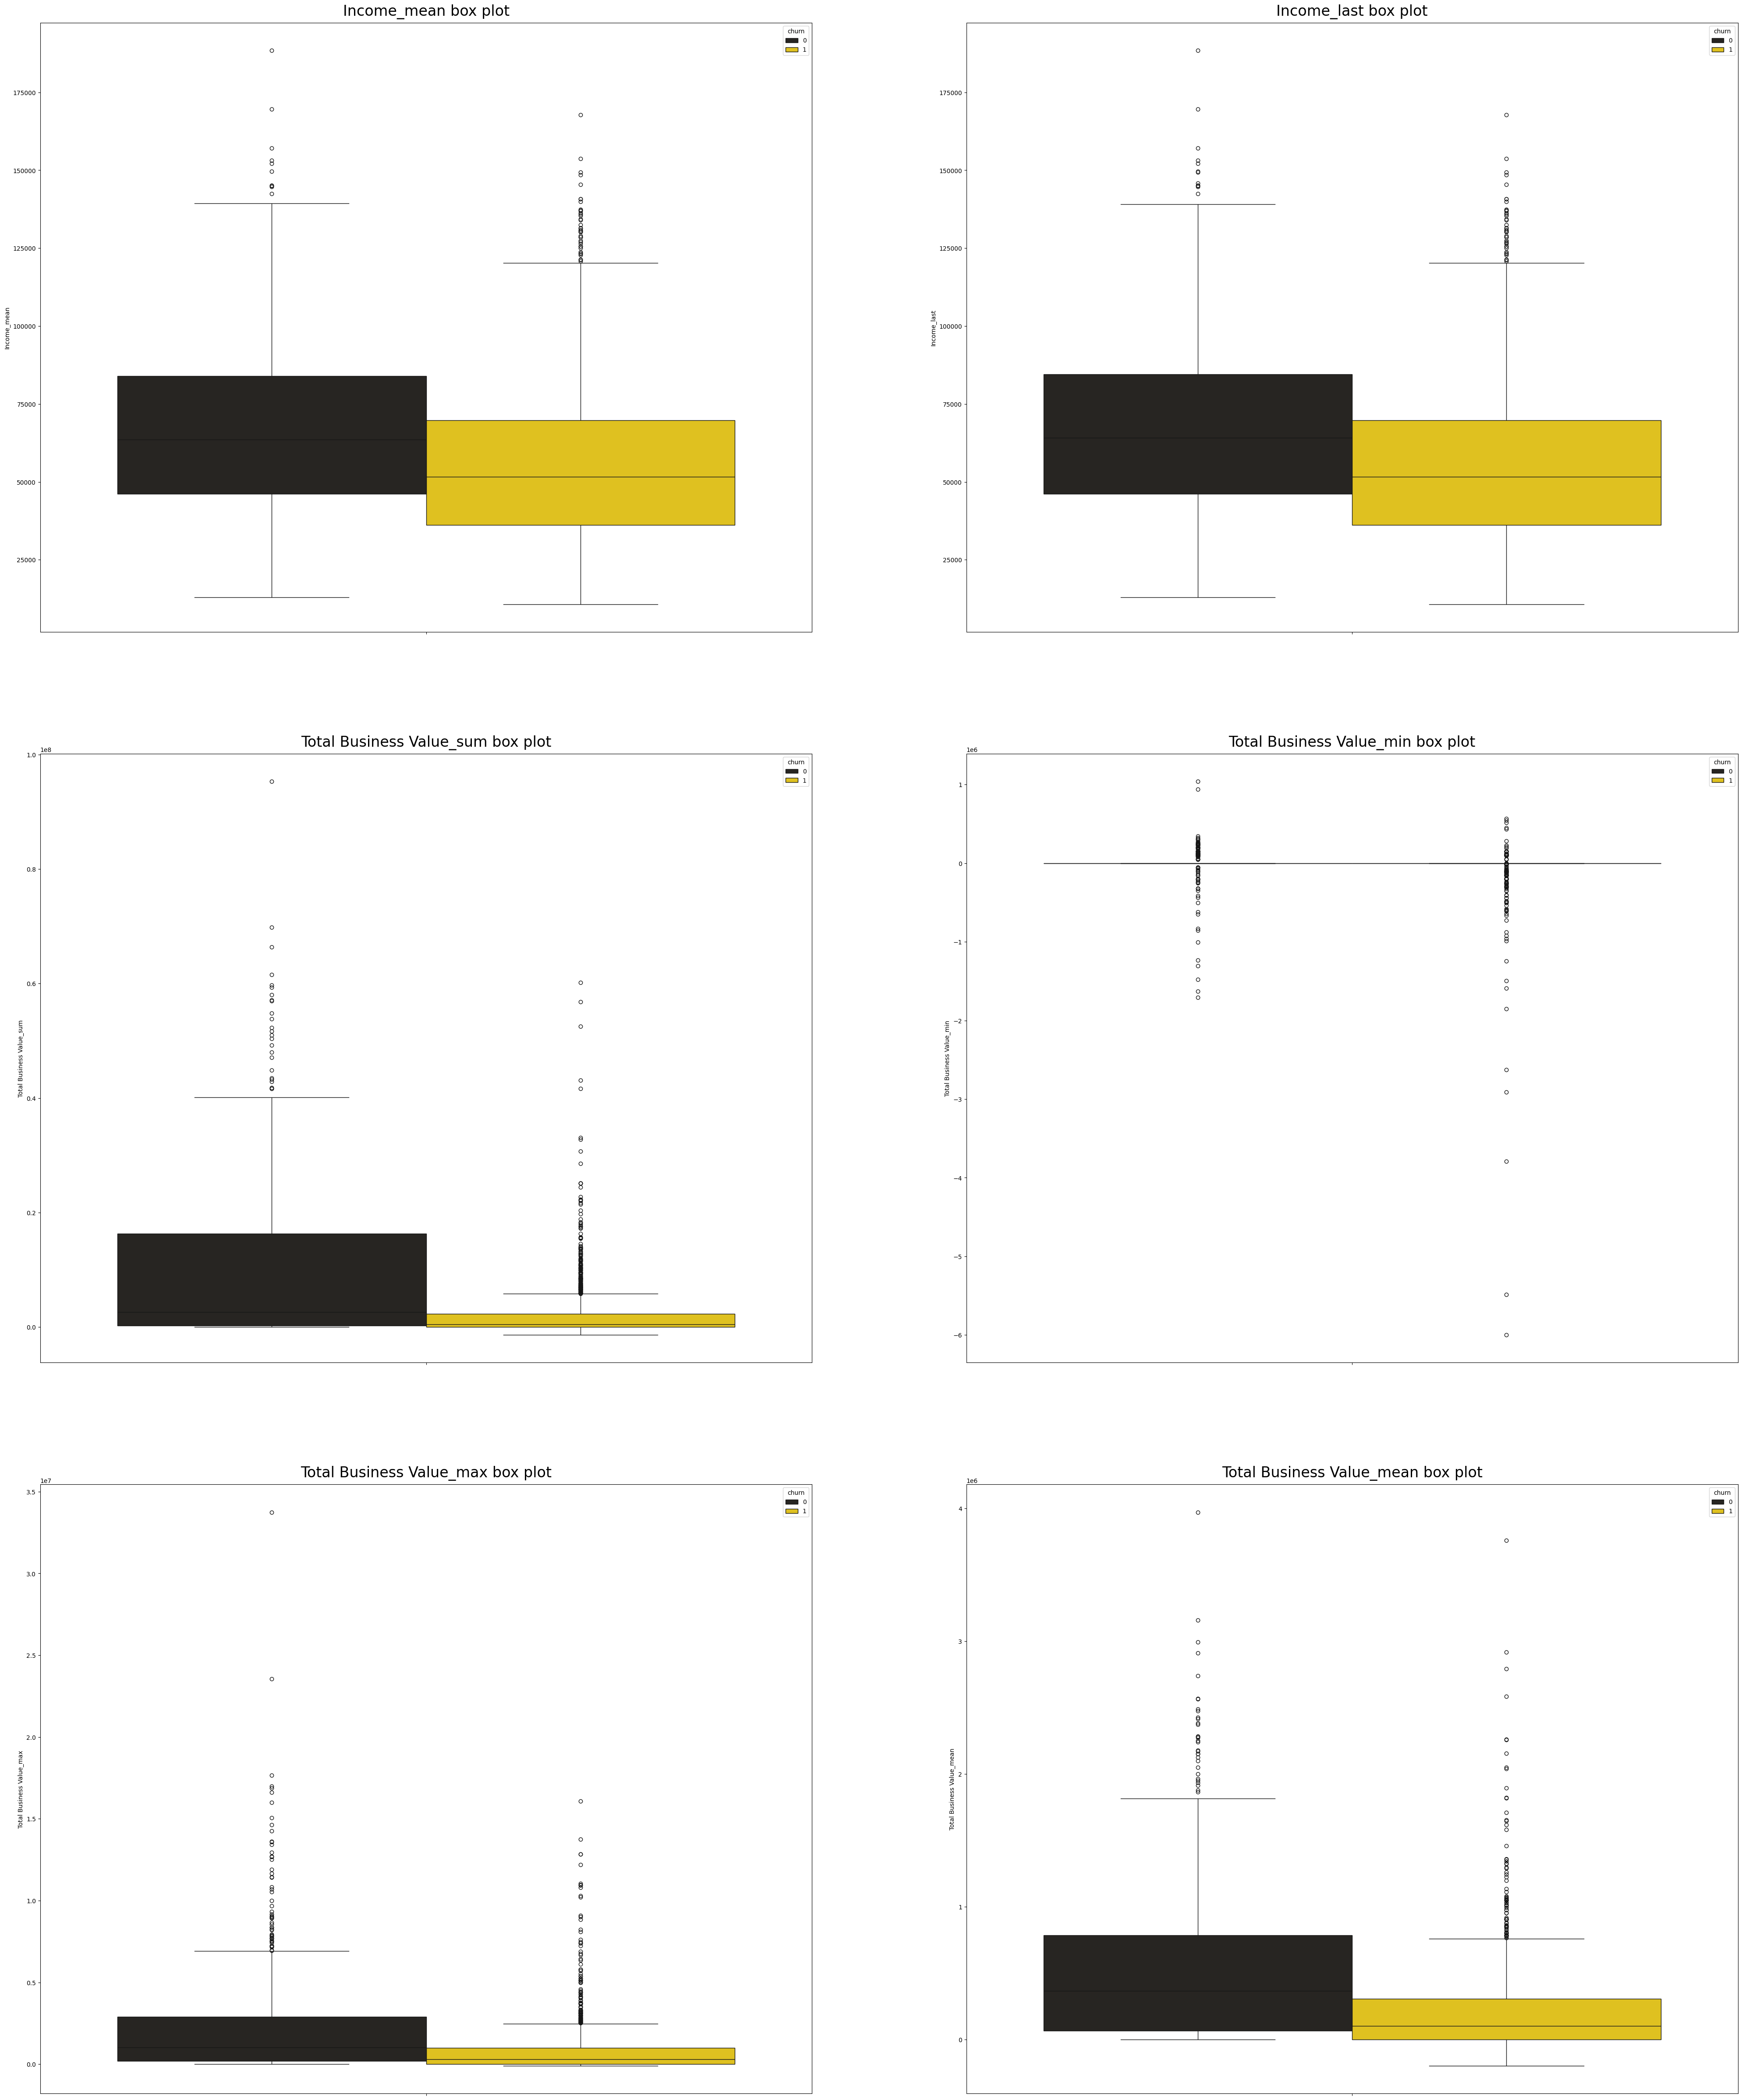

In [10]:
cols = 2
rows = len(numerical_features) // cols

fig, axs = plt.subplots(nrows = rows // 2, ncols = cols, figsize = (50,25))
fig.subplots_adjust(top = 2.0)

ind = 0
for row in range(rows // 2):
    for col in range(cols):
        sns.boxplot(data = df, y = numerical_features[ind], color = "gold",  ax = axs[row, col], hue = "churn")
        axs[row,col].set_title(f'{numerical_features[ind]} box plot', pad = 12, fontsize = 24, color = "black")
        ind += 1
plt.show()   

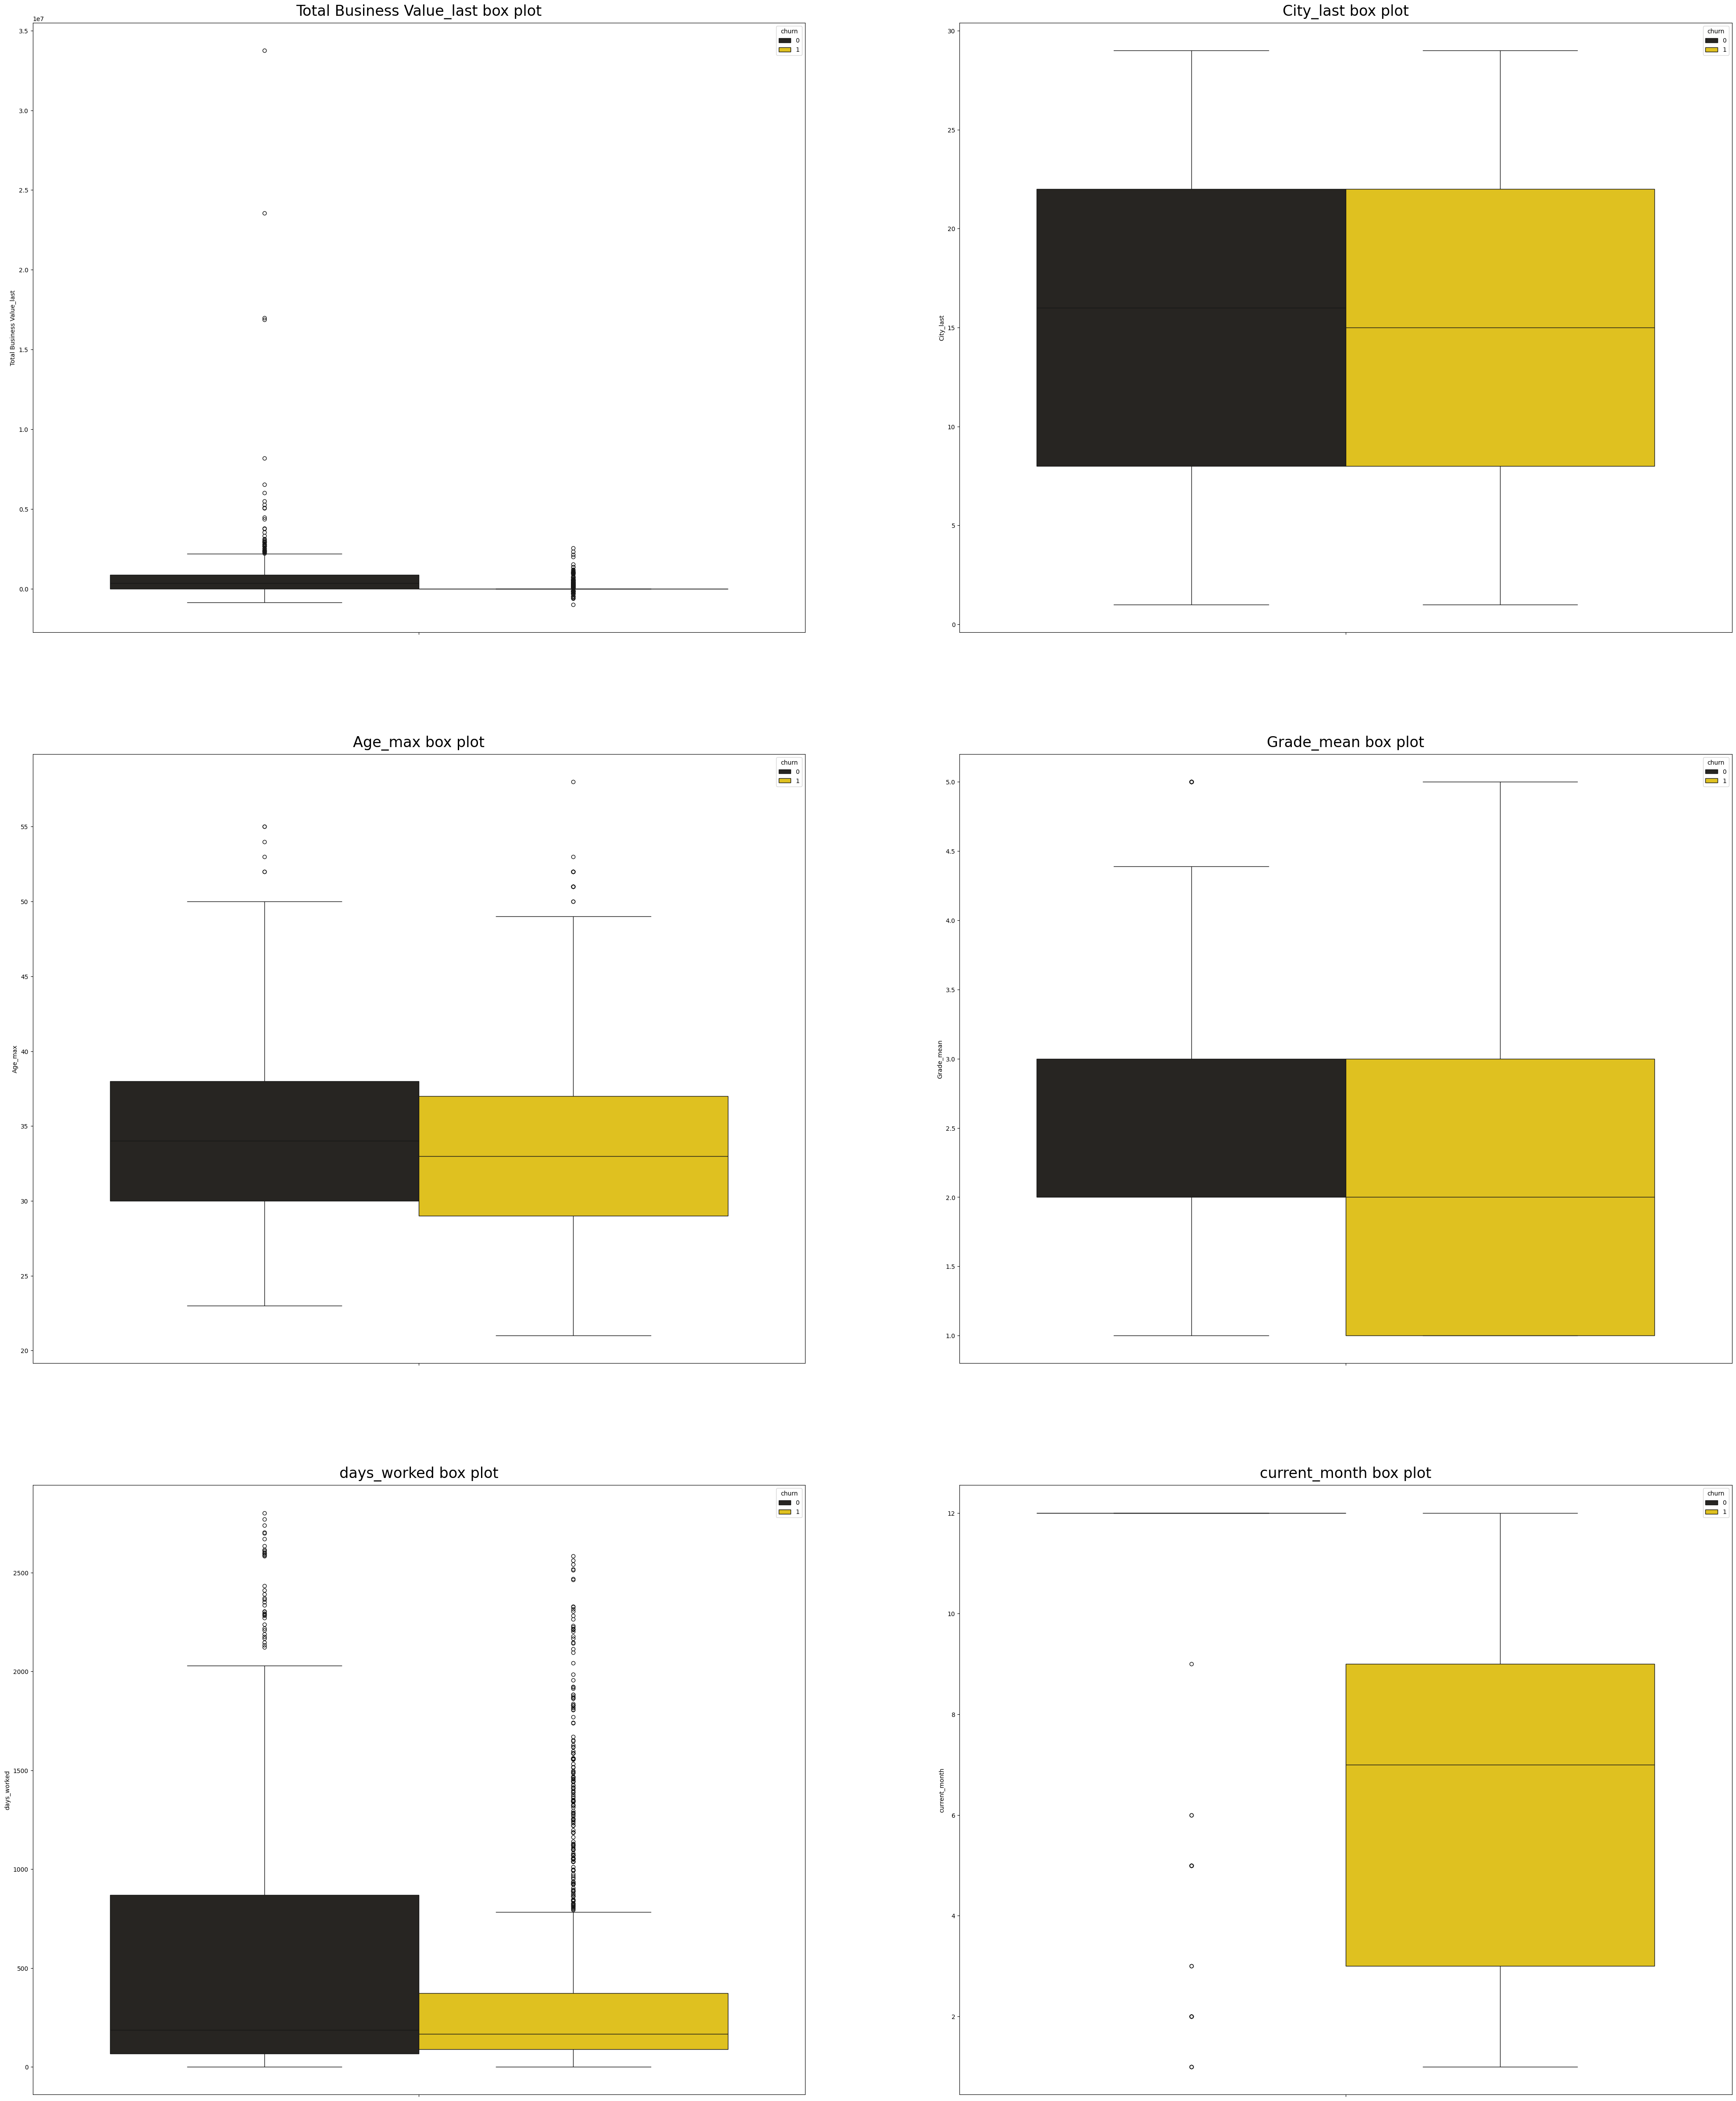

In [11]:
cols = 2
rows = len(numerical_features) // (2 * cols)
ind = len(numerical_features) // 2

fig, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (50,25))
fig.subplots_adjust(top = 2.0)

for row in range(rows):
    for col in range(cols):
        sns.boxplot(data = df, y = numerical_features[ind], color = "gold",  ax = axs[row, col], hue = "churn")
        axs[row,col].set_title(f'{numerical_features[ind]} box plot', pad = 12, fontsize = 24, color = "black")
        ind += 1      
plt.show() 

In [12]:
categorical_features

['Education_Level_last',
 'Joining Designation_last',
 'Grade_min',
 'Grade_max',
 'Grade_last',
 'Quarterly Rating_max',
 'Gender_last',
 'churn',
 'rating_change',
 'income_change']

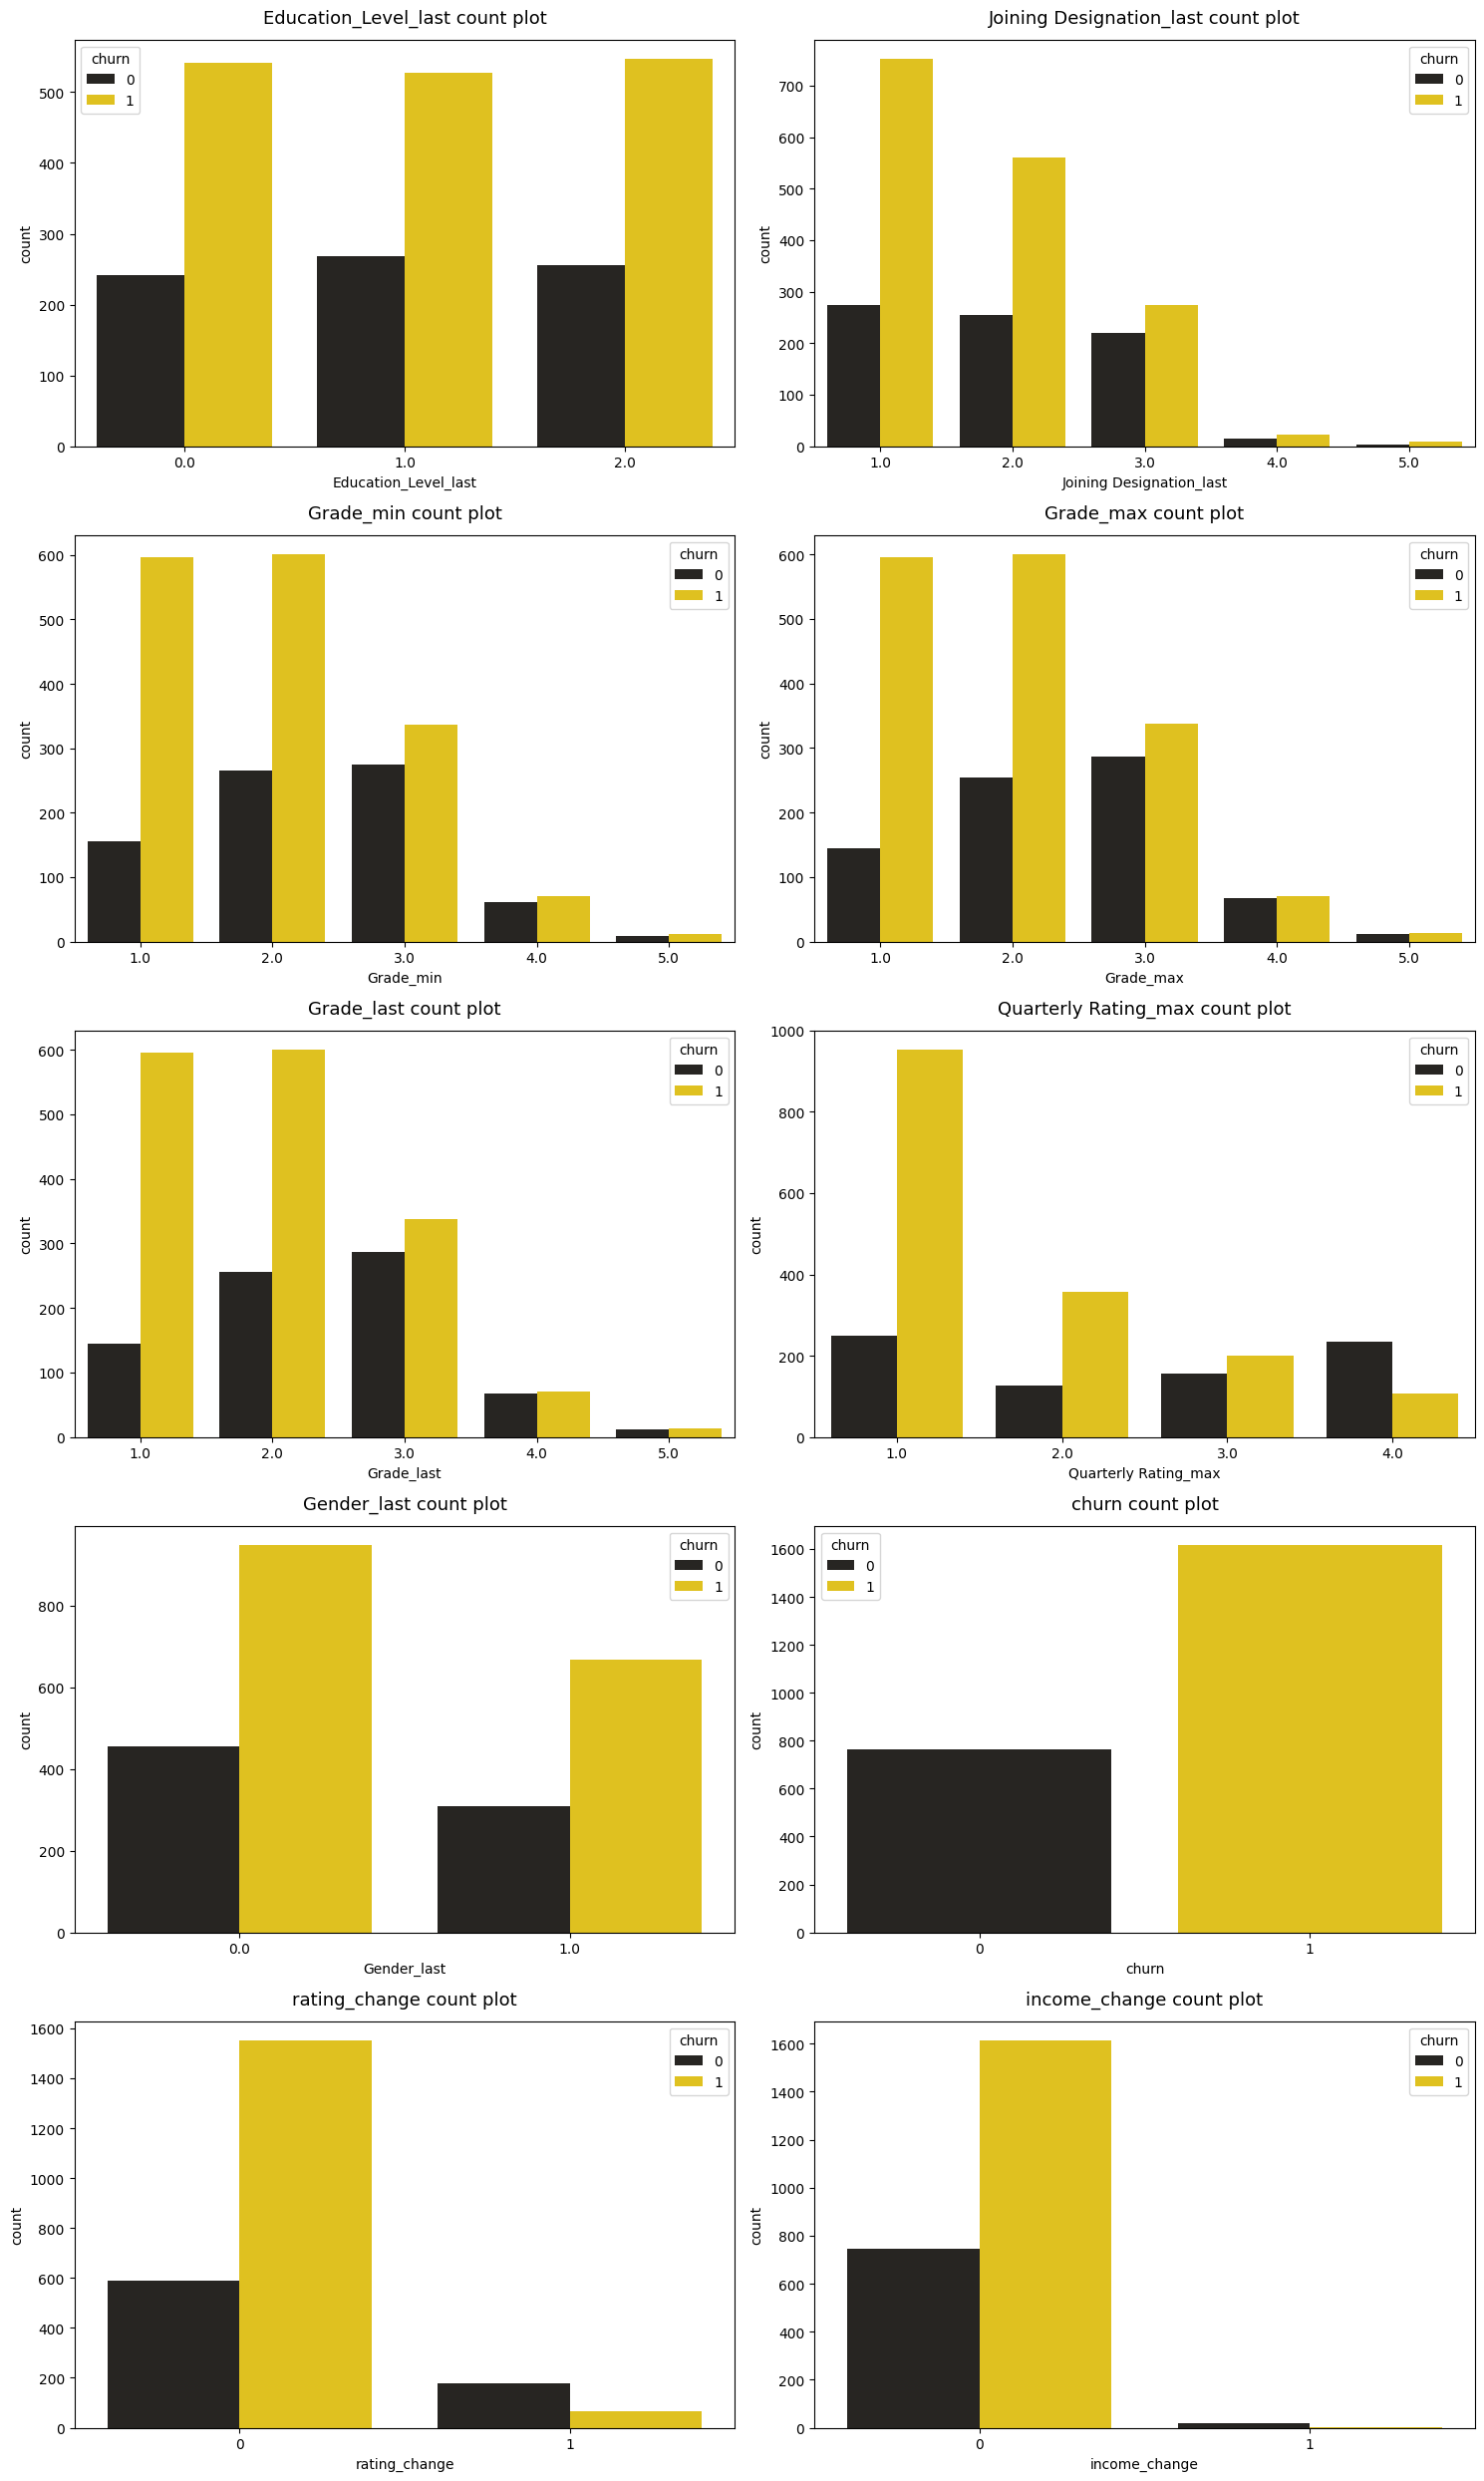

In [13]:
cols = 2
rows = (len(categorical_features) + cols - 1) // cols  # Adjusted rows calculation

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 5))  # Adjusted figsize

fig.subplots_adjust(top=2.0)

ind = 0
for row in range(rows):
    for col in range(cols):
        if ind < len(categorical_features):
            sns.countplot(data=df, x=categorical_features[ind], hue="churn", color="gold", ax=axs[row, col])
            axs[row, col].set_title(f'{categorical_features[ind]} count plot', pad=12, fontsize=13)
            ind += 1

plt.tight_layout()  # Adjusted layout
plt.show()

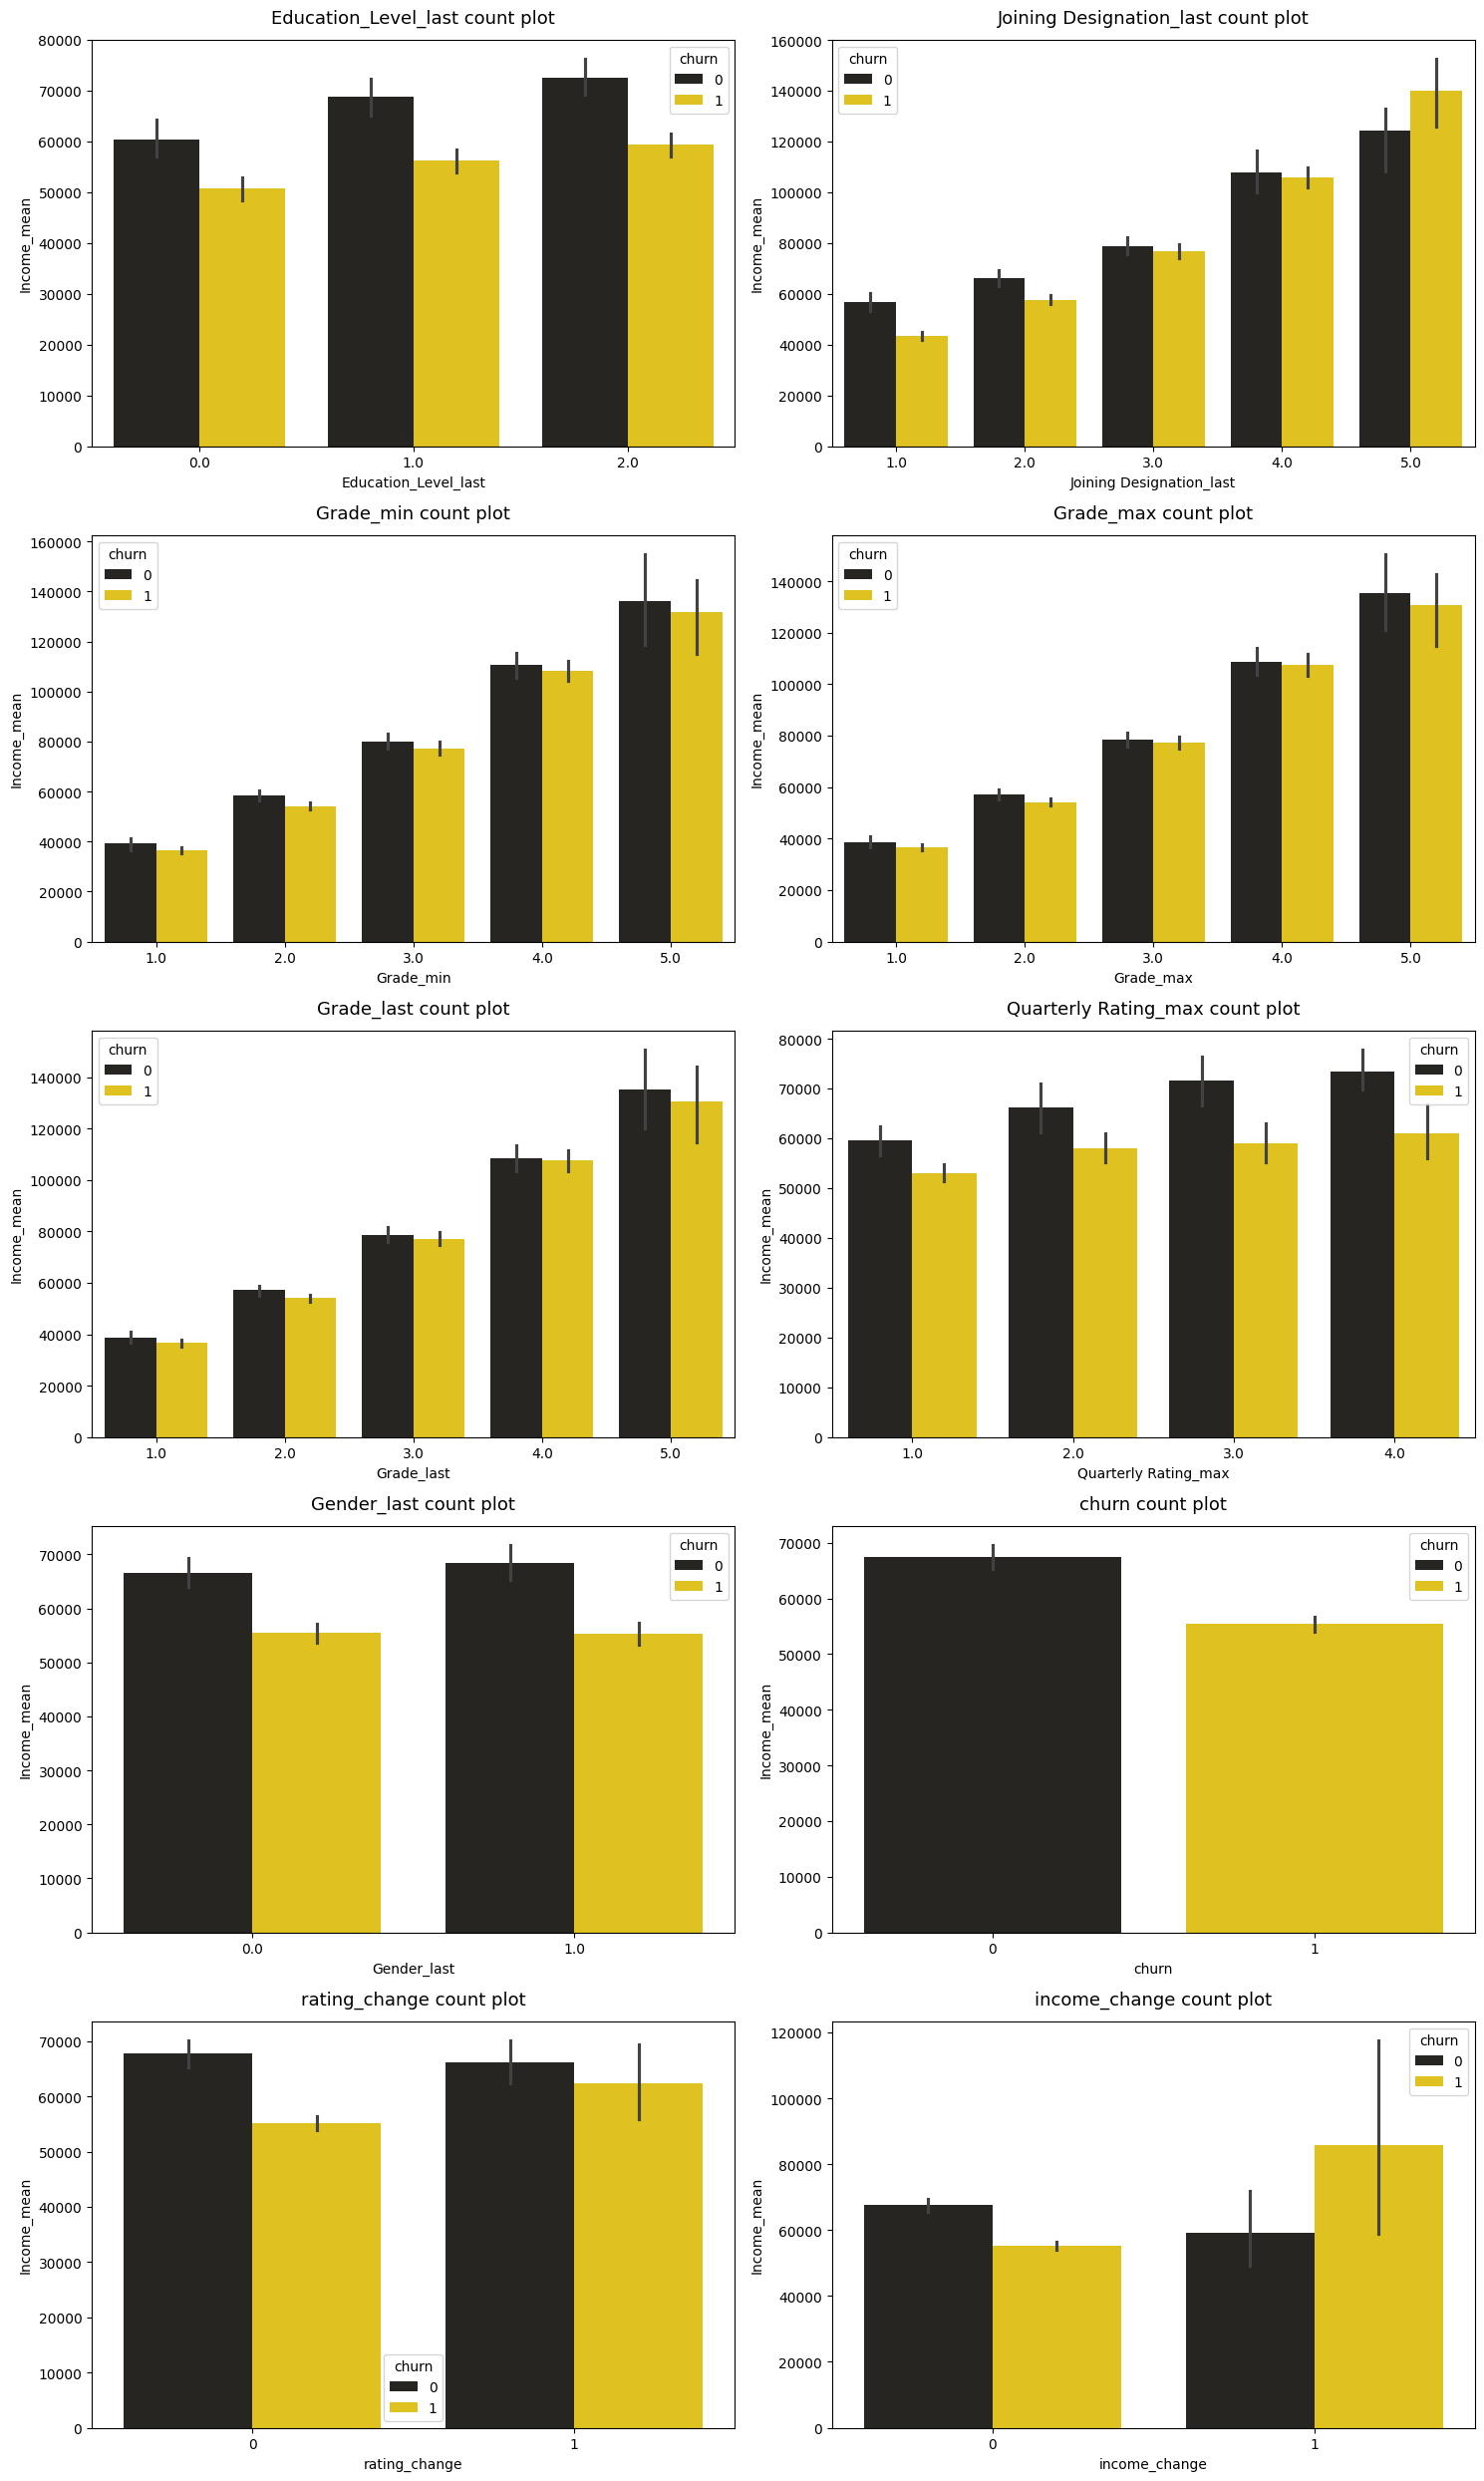

In [14]:
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 5))  # Adjusted figsize

fig.subplots_adjust(top=2.0)

ind = 0
for row in range(rows):
    for col in range(cols):
        if ind < len(categorical_features):
            sns.barplot(data=df, x=categorical_features[ind], hue="churn", y = "Income_mean",color="gold", ax=axs[row, col])
            axs[row, col].set_title(f'{categorical_features[ind]} count plot', pad=12, fontsize=13)
            ind += 1

plt.tight_layout()  # Adjusted layout
plt.show()

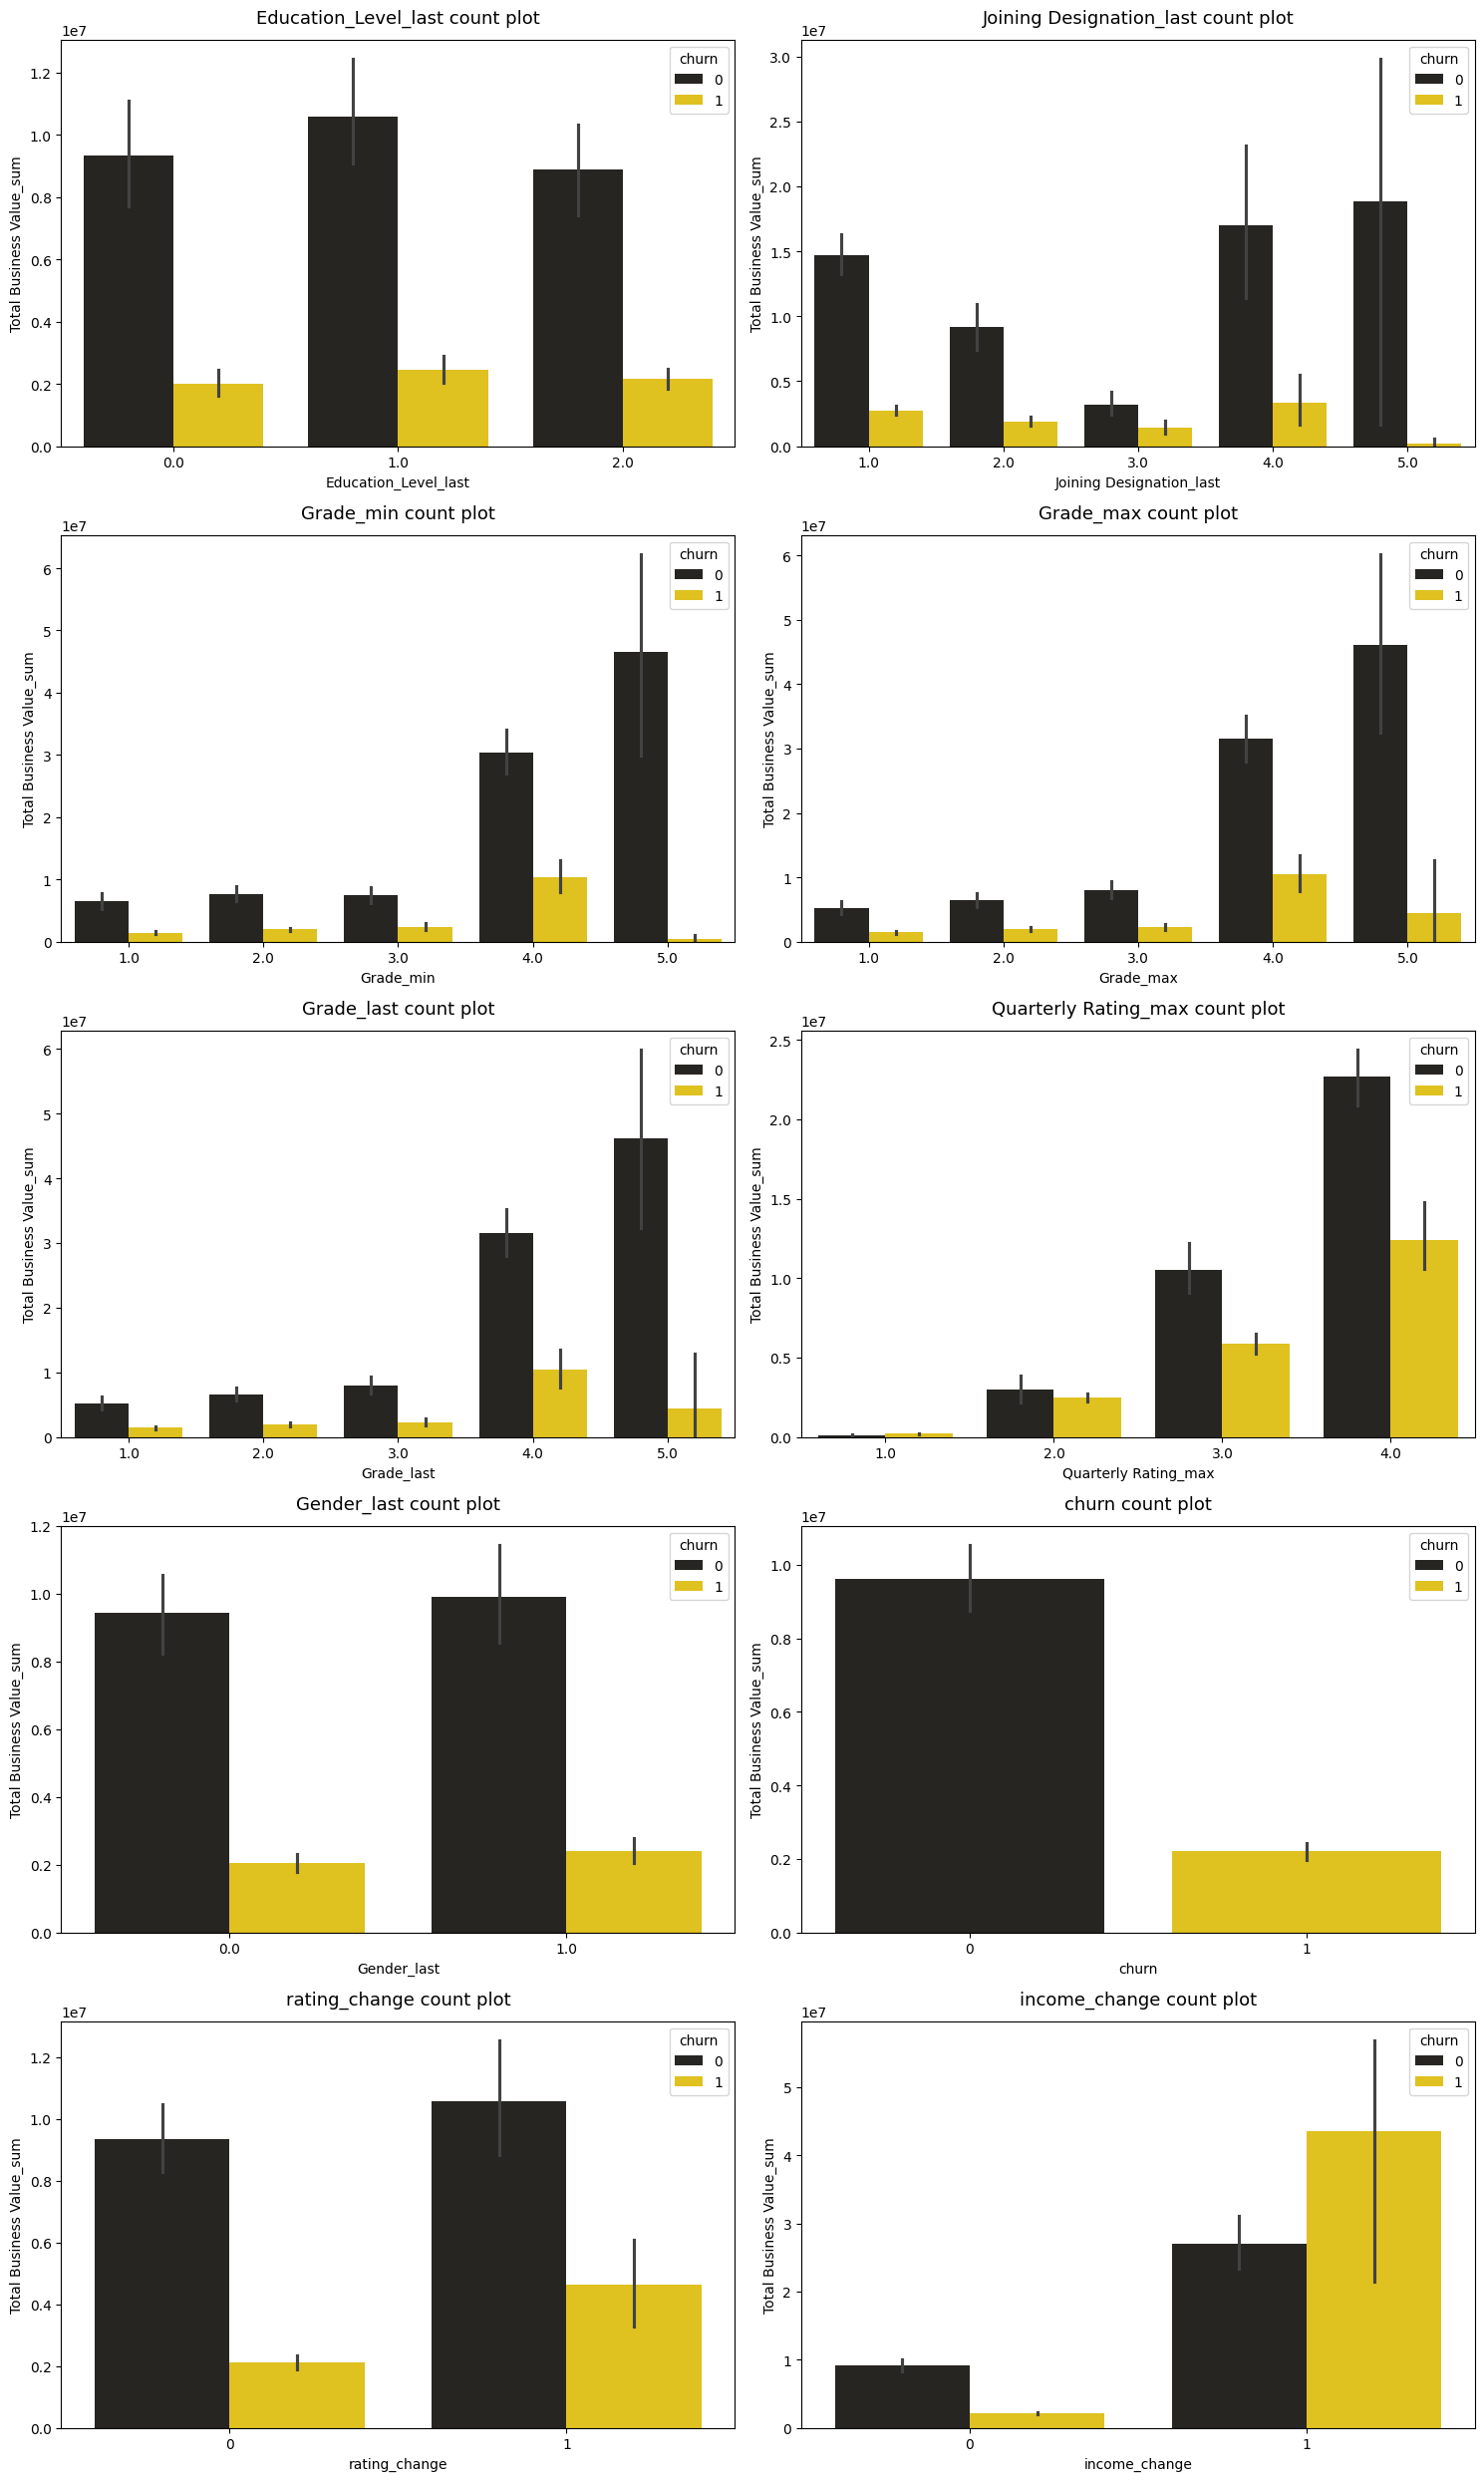

In [15]:
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 5))  # Adjusted figsize

fig.subplots_adjust(top=2.0)

ind = 0
for row in range(rows):
    for col in range(cols):
        if ind < len(categorical_features):
            sns.barplot(data=df, x=categorical_features[ind], hue="churn", y = "Total Business Value_sum",color="gold", ax=axs[row, col])
            axs[row, col].set_title(f'{categorical_features[ind]} count plot', pad=12, fontsize=13)
            ind += 1

plt.tight_layout()  # Adjusted layout
plt.show()

<Axes: xlabel='Age_max', ylabel='Income_mean'>

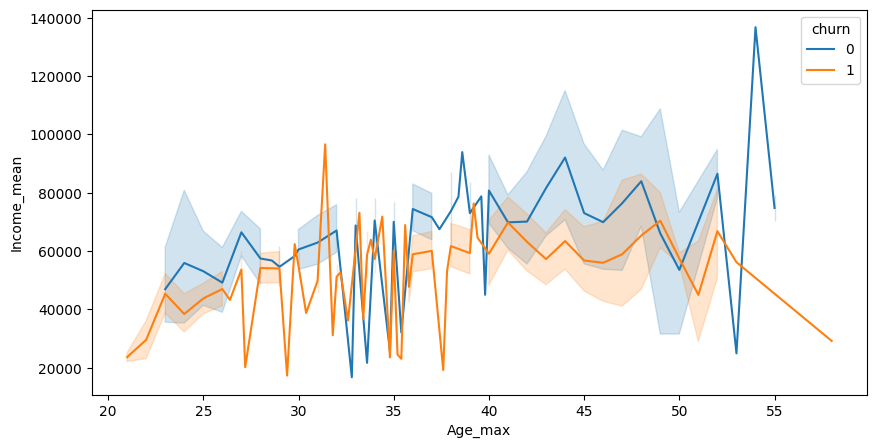

In [16]:
plt.figure(figsize=(10, 5))
sns.lineplot(data = df,x = "Age_max",y = "Income_mean",hue = "churn")

<Axes: xlabel='Age_max', ylabel='Total Business Value_sum'>

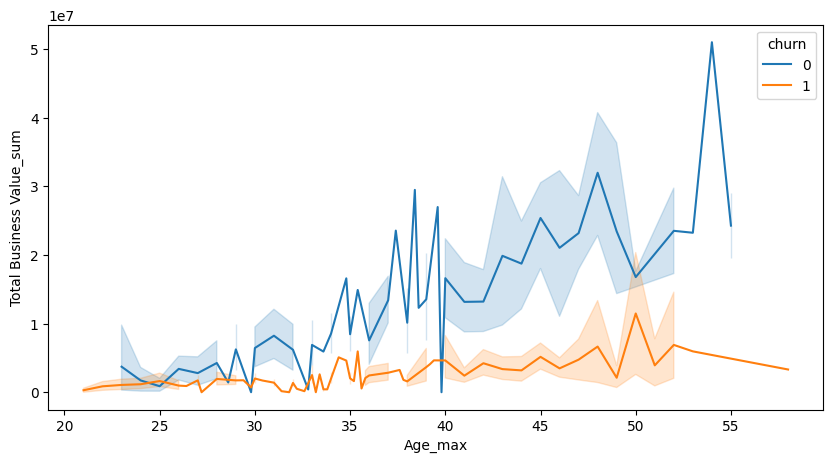

In [17]:
plt.figure(figsize=(10, 5))
sns.lineplot(data = df,x = "Age_max",y = "Total Business Value_sum",hue = "churn")

#### outlier treatment

In [19]:
# skewness = skew(df[numerical_features])
# right_skew, left_skew = [], []

# for ind in range(len(numerical_features)):
#     if skewness[ind] < 0:
#         left_skew.append(numerical_features[ind])
#     else:
#         right_skew.append(numerical_features[ind])

# print(f"right tailed = {right_skew}")
# print(f"left tailed = {left_skew}")


In [20]:
for col in numerical_features:
    iqr = df[col].quantile(.75) - df[col].quantile(.25)
    lower_bound = df[col].quantile(.25) - 1.5 * iqr
    upper_bound = df[col].quantile(.75) + 1.5 * iqr

    df.loc[:, col] = df.loc[:, col].apply(lambda x : upper_bound if x > upper_bound else x)

In [21]:
# right_skew.remove("days_worked")
# left_skew = [item for item in left_skew if item not in ["City_last", "current_month"]]

In [22]:
# for col in right_skew:
#     df[col] = np.log1p(df[col])

# for col in left_skew:
#     df[col] = np.square(df[col])    

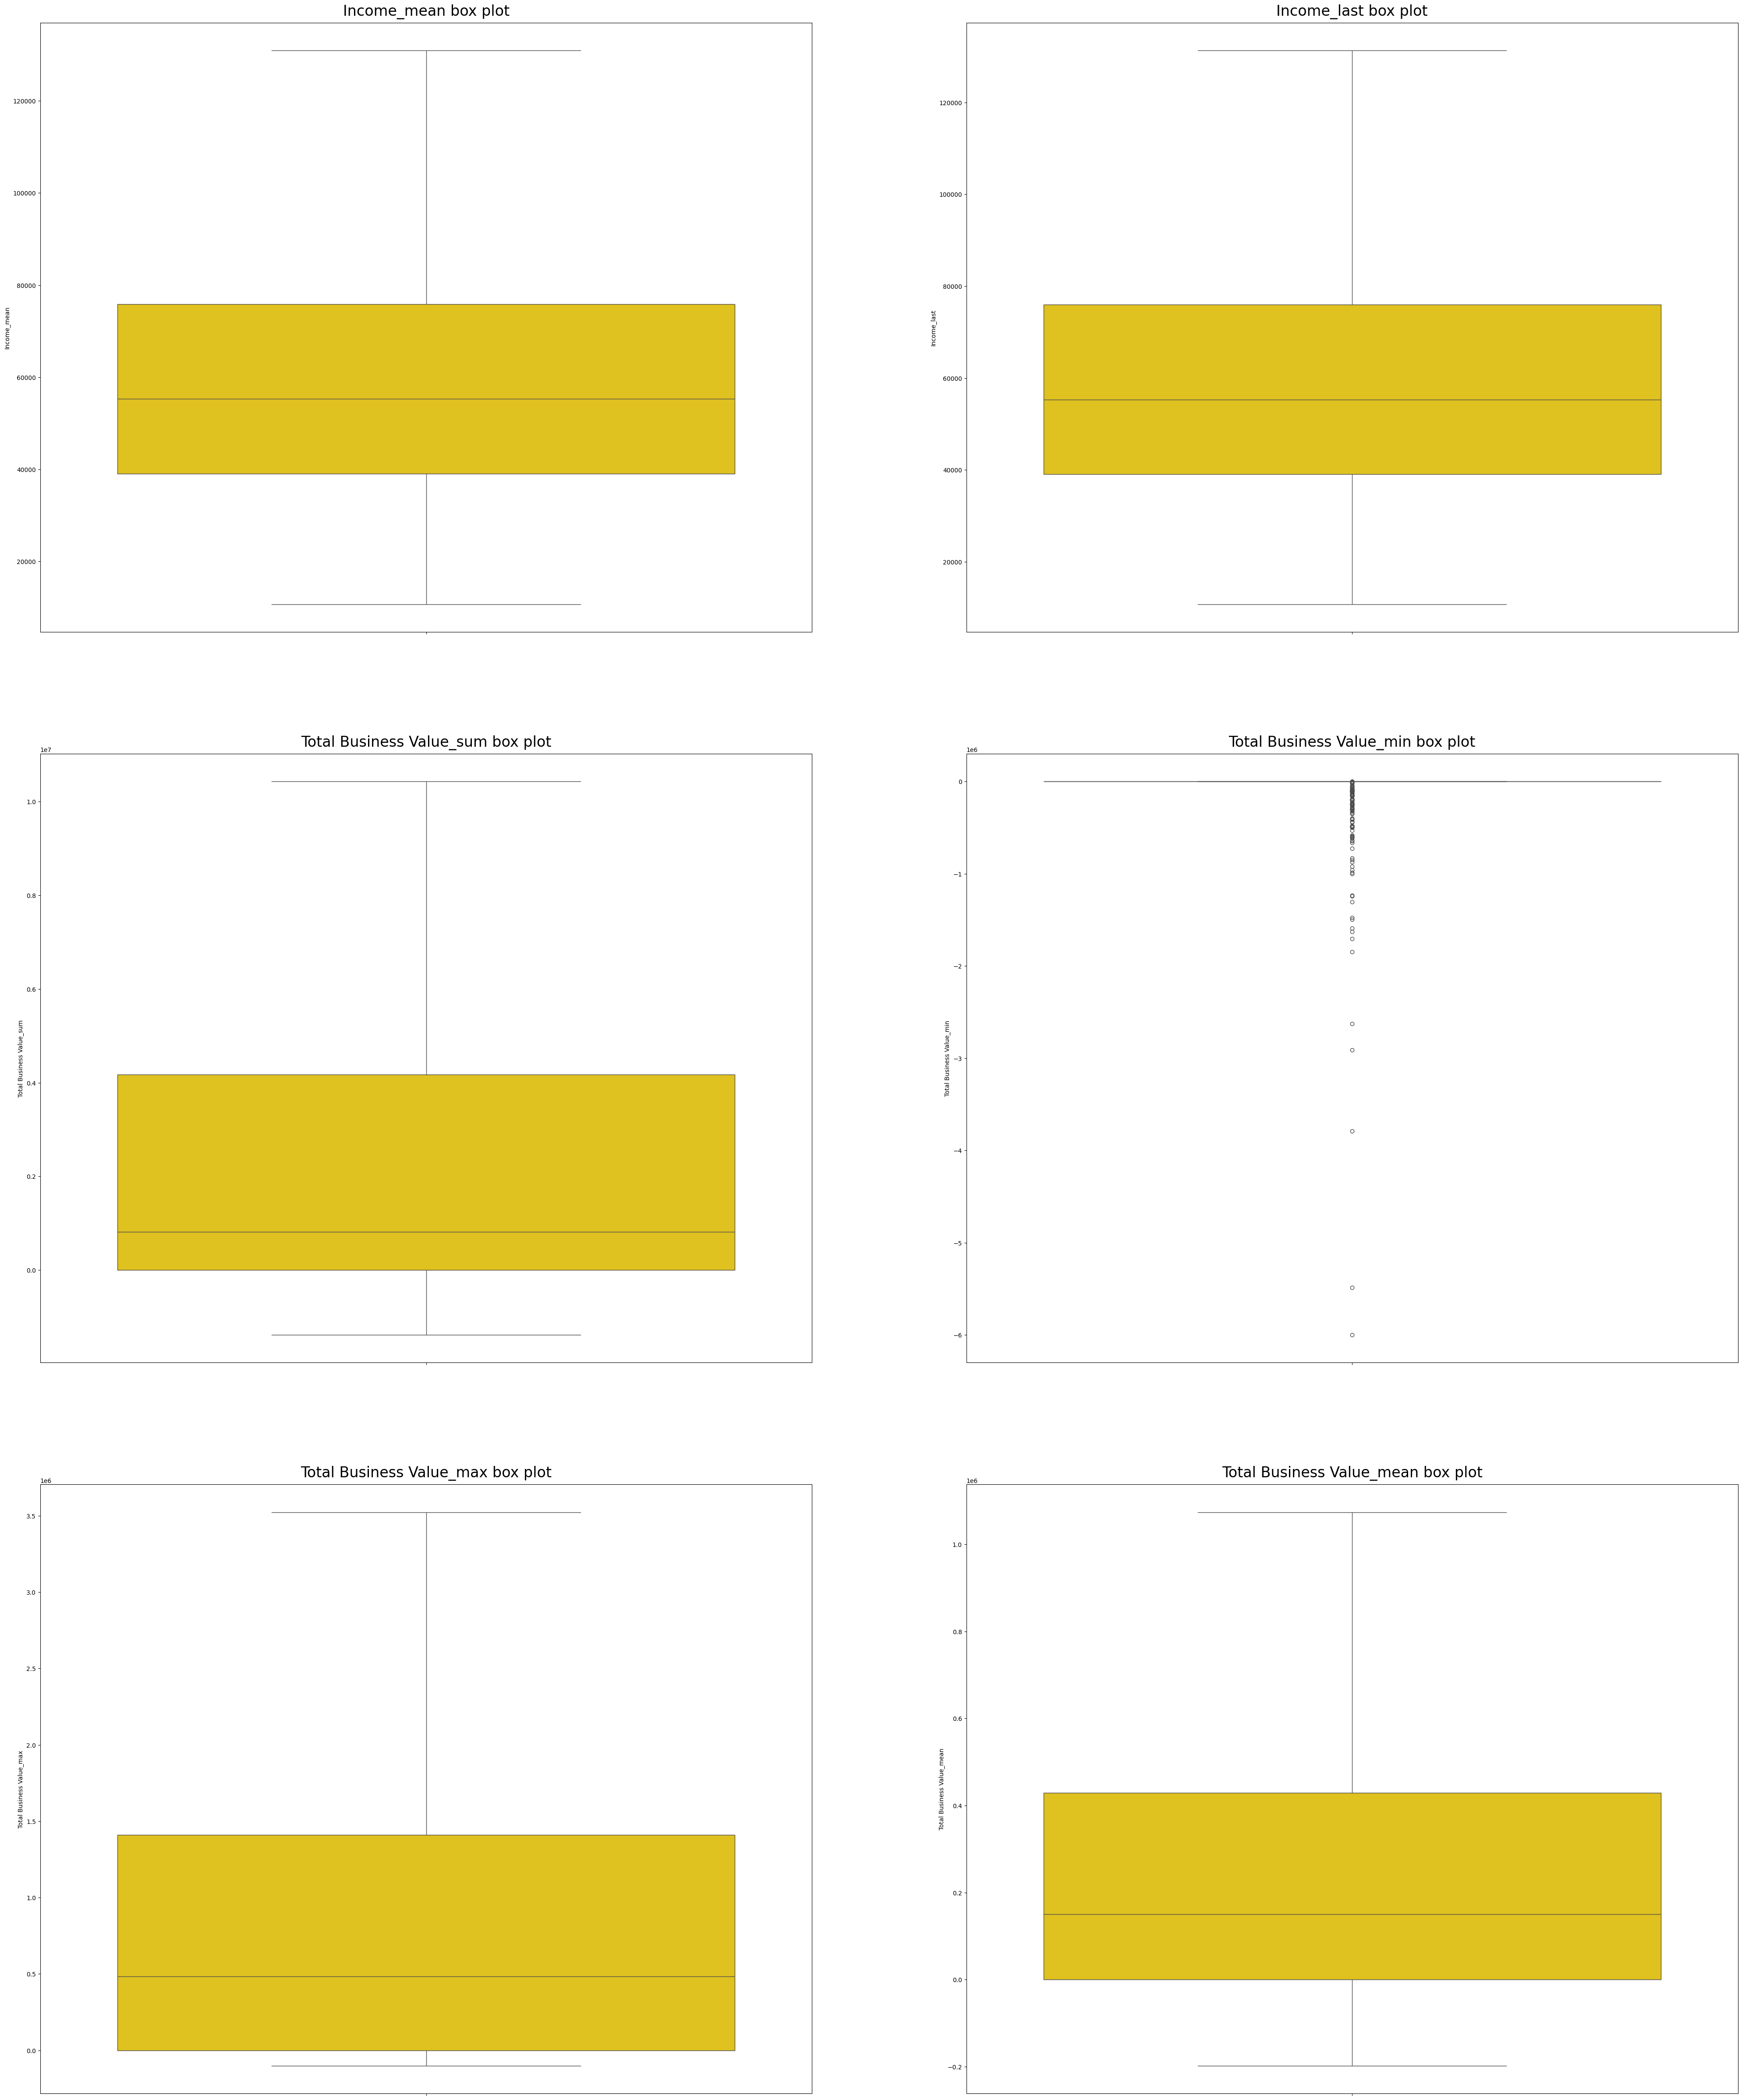

In [25]:
cols = 2
rows = len(numerical_features) // cols

fig, axs = plt.subplots(nrows = rows // 2, ncols = cols, figsize = (50,25))
fig.subplots_adjust(top = 2.0)

ind = 0
for row in range(rows // 2):
    for col in range(cols):
        sns.boxplot(data = df, y = numerical_features[ind], color = "gold",  ax = axs[row, col])
        axs[row,col].set_title(f'{numerical_features[ind]} box plot', pad = 12, fontsize = 24, color = "black")
        ind += 1
plt.show() 

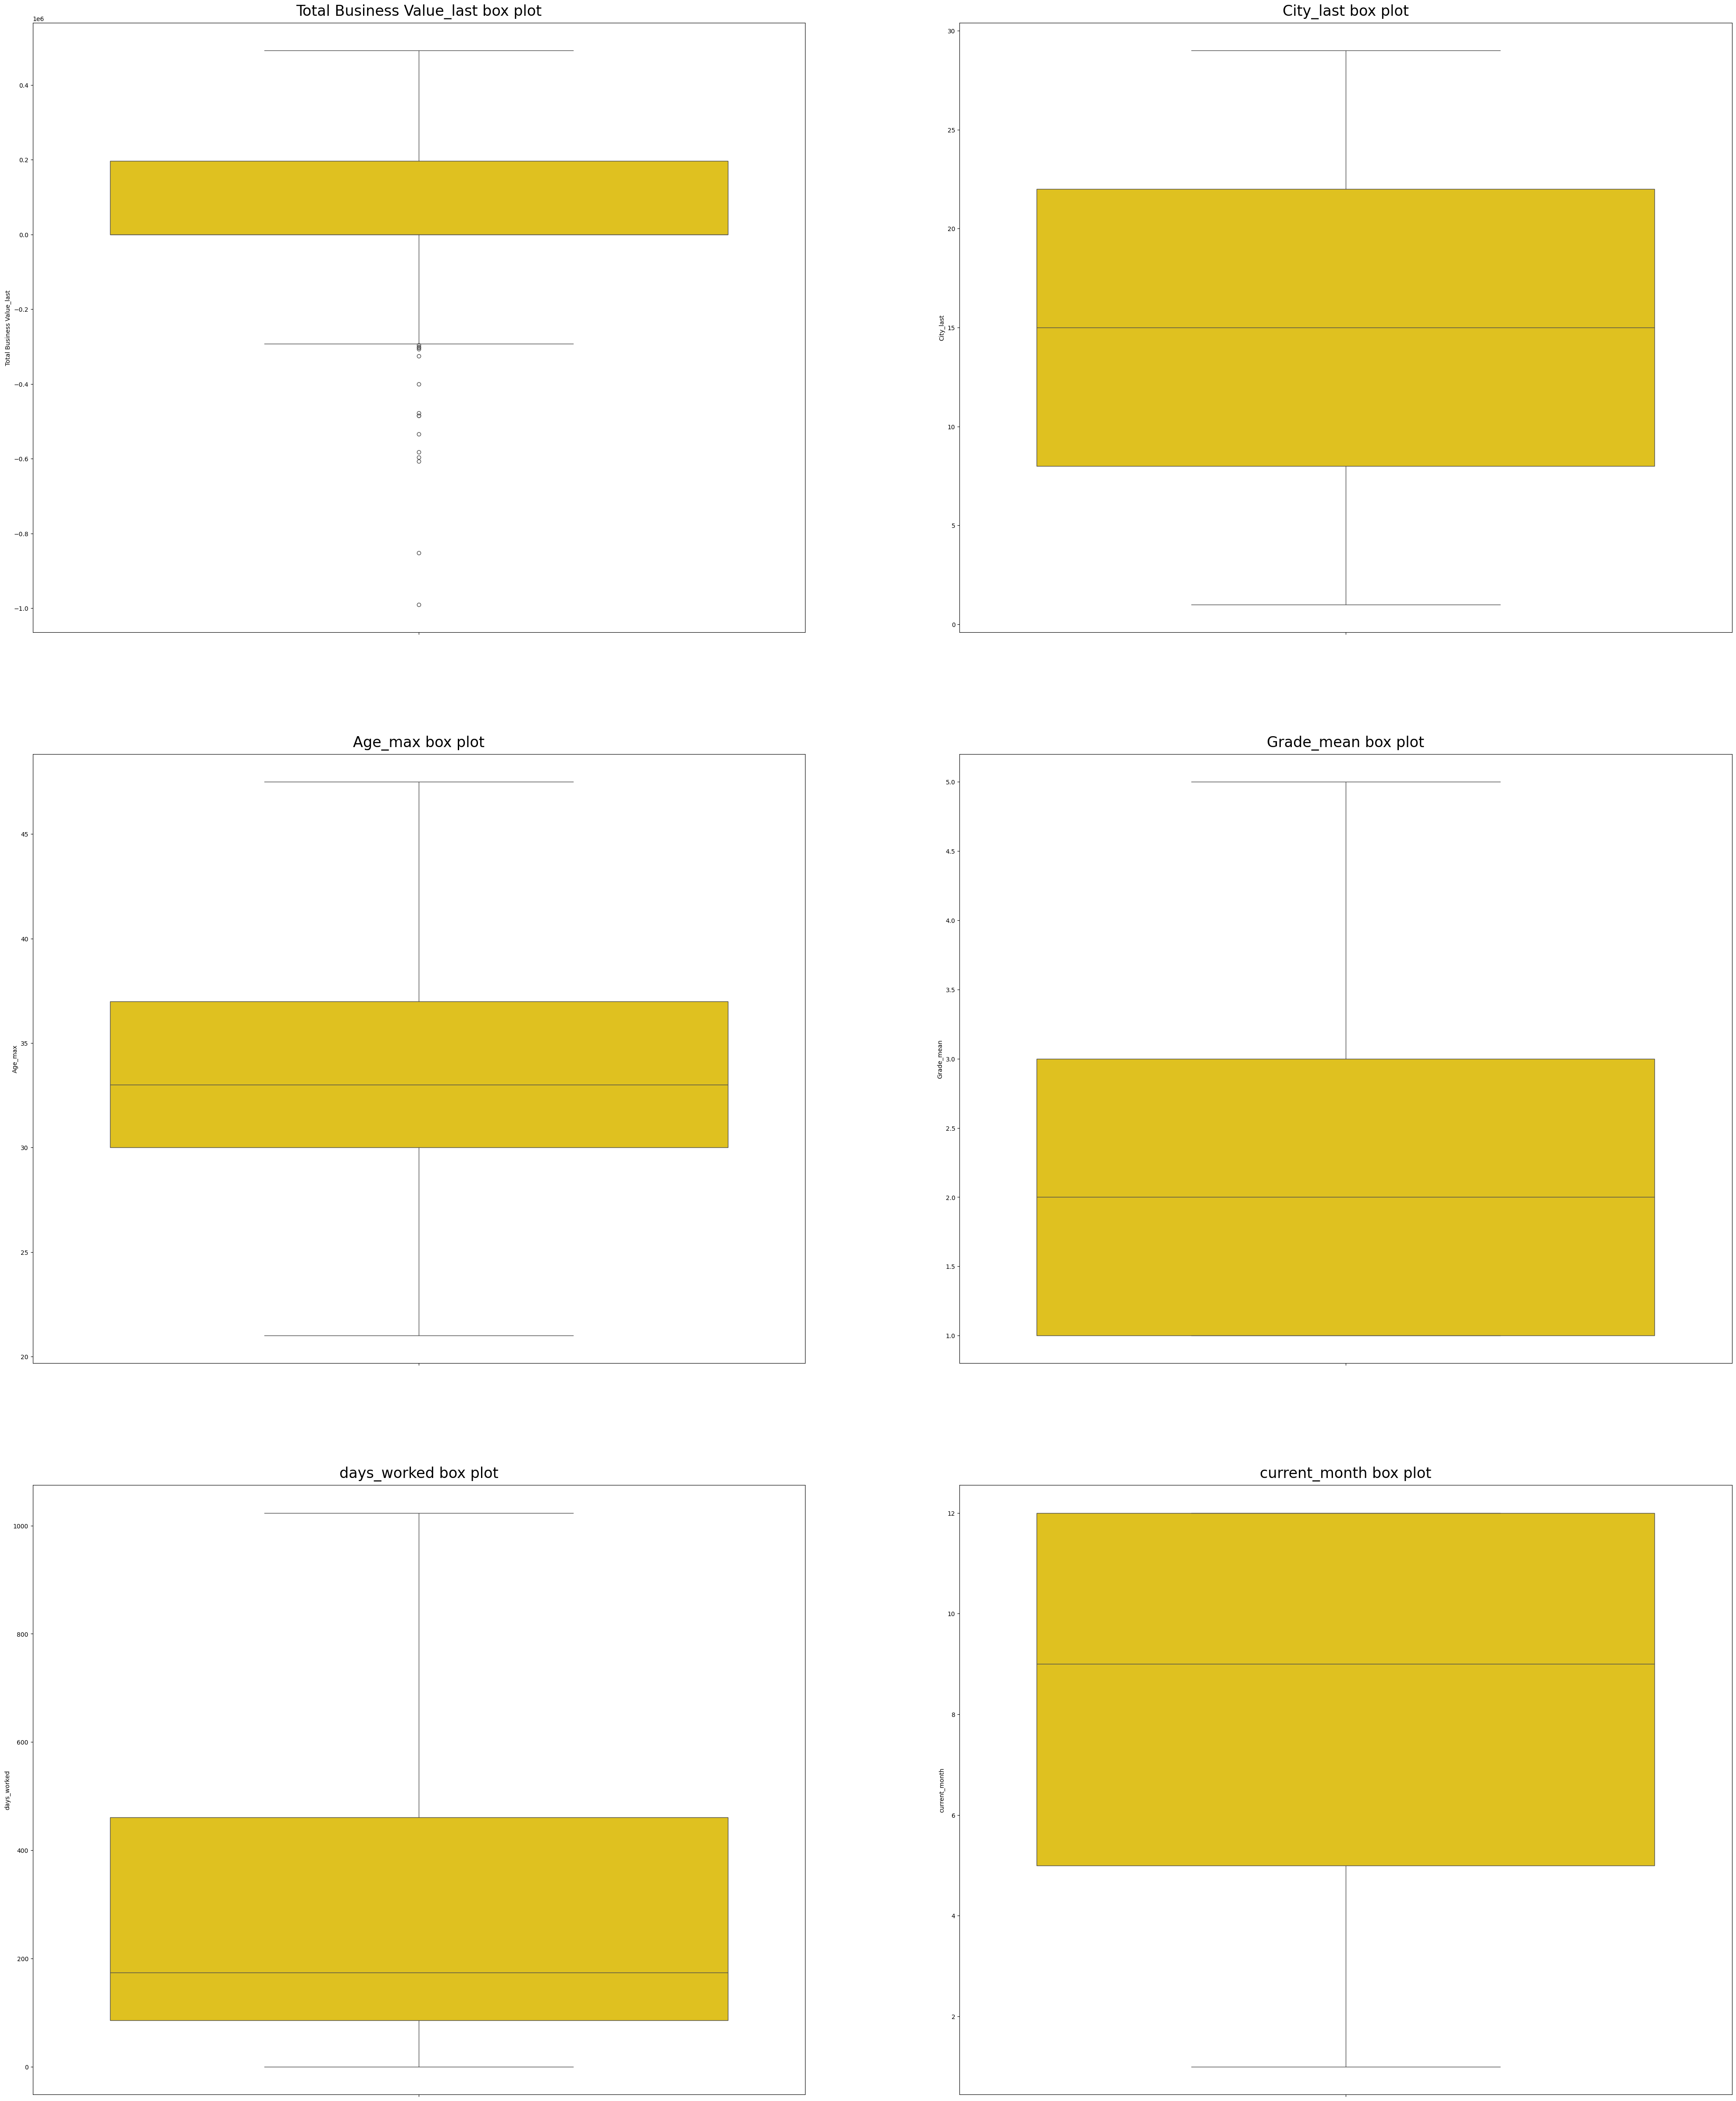

In [26]:
cols = 2
rows = len(numerical_features) // (2 * cols)
ind = len(numerical_features) // 2

fig, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (50,25))
fig.subplots_adjust(top = 2.0)

for row in range(rows):
    for col in range(cols):
        sns.boxplot(data = df, y = numerical_features[ind], color = "gold",  ax = axs[row, col])
        axs[row,col].set_title(f'{numerical_features[ind]} box plot', pad = 12, fontsize = 24, color = "black")
        ind += 1
plt.show()  

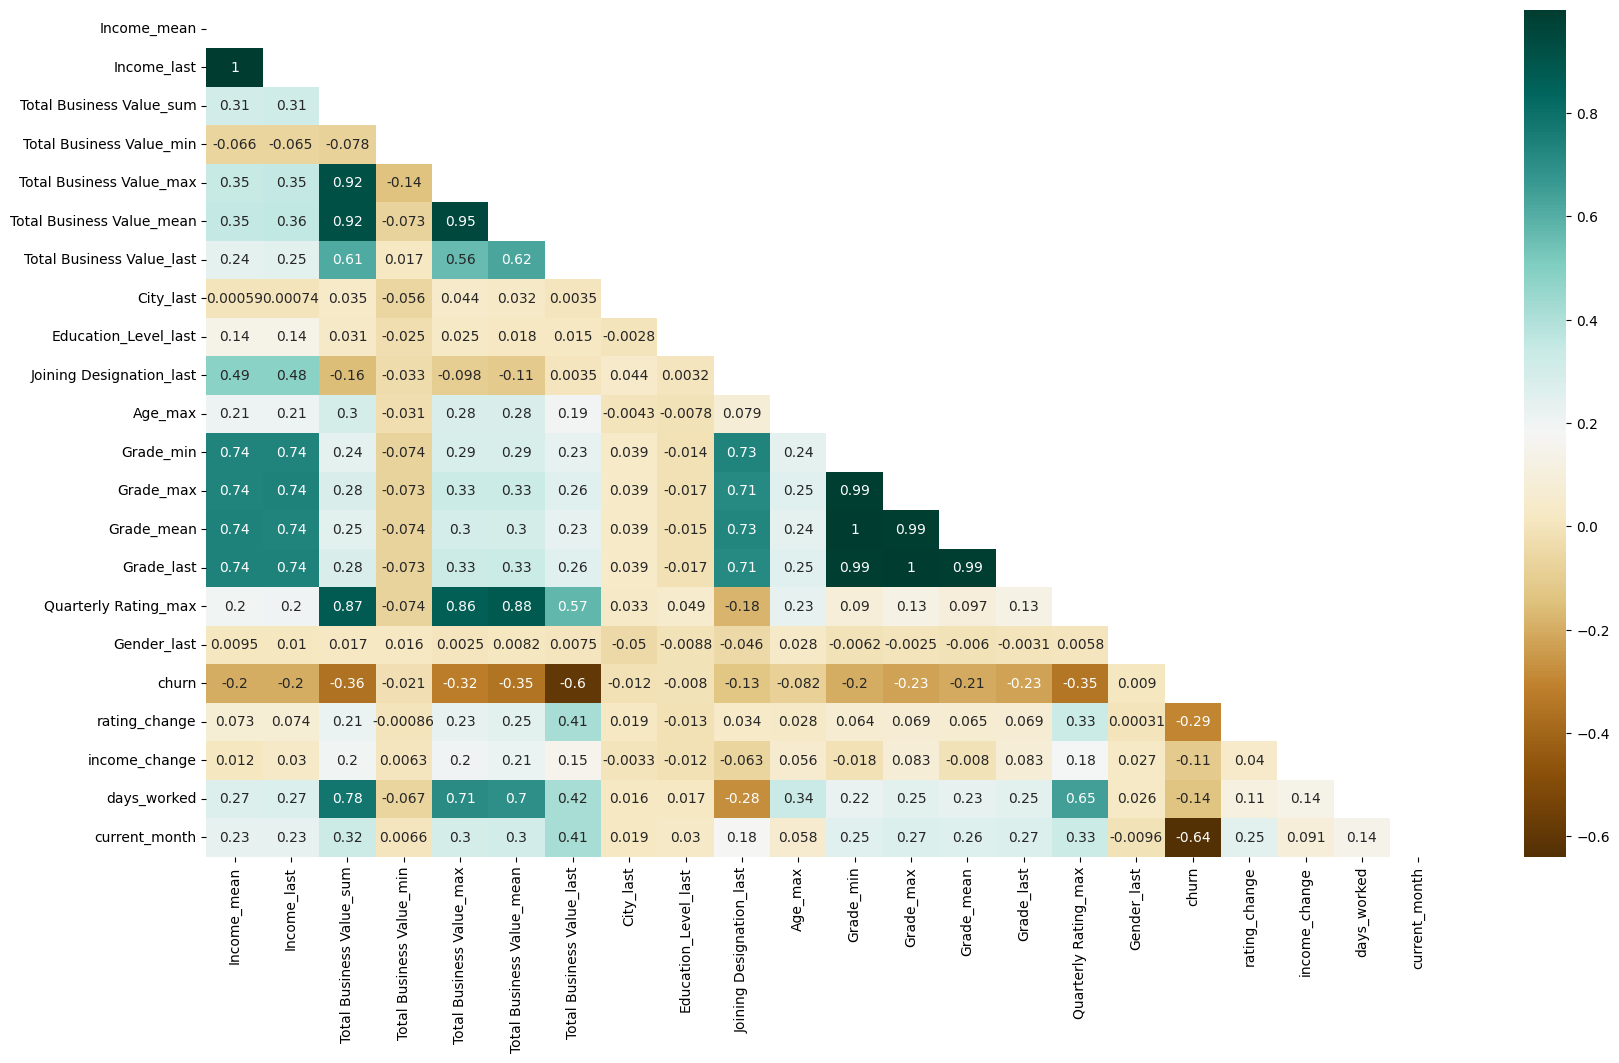

In [27]:
fig, ax = plt.subplots(figsize=(20,11))
sns.heatmap(df.corr(), annot = True, cmap = 'BrBG', ax = ax, mask = np.triu(np.ones_like(df.corr(), dtype=bool)))
plt.show()

In [29]:
df.to_csv("/Users/praveenallam/Desktop/data_science_business_cases/data.csv",index = False)